In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import os
import gzip
from pathlib import Path
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec


In [36]:
!jupyter nbconvert --to html "C:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\Chimérica\chimérica.ipynb"

[NbConvertApp] Converting notebook C:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\Chimérica\chimérica.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 4787979 bytes to C:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\Chimérica\chimérica.html


In [4]:


# Configuración para gráficos de alta calidad
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
sns.set_style("whitegrid")

# Definir rutas
current_dir = Path.cwd()
base_path = current_dir.parent.parent.parent
files_path = base_path / "data" / "processed" / "ficheros_paper"
output_path_fig = current_dir / "figures" 
output_path_tabs = current_dir / "tables" 
# Crear directorios de salida si no existen
os.makedirs(output_path_fig, exist_ok=True)
os.makedirs(output_path_tabs, exist_ok=True)

# Cargar datos de dependencias
df_full = pd.read_csv(files_path / "dependencies_full.csv.gz", sep=";")
df_weighted = pd.read_csv(files_path / "weighted_dependencies.csv.gz", sep=";")
df_critical = pd.read_csv(files_path / "critical_relations.csv.gz", sep=";")
df_intermediary = pd.read_csv(files_path / "intermediary_roles.csv.gz", sep=";")
df_summary = pd.read_csv(files_path / "intermediary_summary.csv.gz", sep=";")

print("📊 Datos cargados correctamente")
print(f"Número de registros en df_full: {len(df_full)}")
print(f"Número de registros en df_intermediary: {len(df_intermediary)}")

# Sectores estratégicos para el análisis
sectores_estrategicos = [
    'Aircraft and spacecraft',
    'Accumulators primary cells and batteries',
    'Basic iron and steel',
    'Basic precious and non-ferrous metals',
    'Electronic valves tubes etc.',
    'TV and radio receivers and associated goods',
    'Office accounting and computing machinery',
    'Medical surgical and orthopaedic equipment',
    'Optical instruments & photographic equipment'
]

# Diccionario de aranceles
aranceles = {
  # Imagen 1
  "COL": 10,  # Colombia
  "SGP": 10,  # Singapur
  "TUR": 10,  # Turquía
  "GBR": 10,  # Reino Unido
  
  # Imagen 2
  "PHL": 18,  # Filipinas
  "ZWE": 18,  # Zimbabue
  "ISR": 17,  # Israel
  "ZMB": 17,  # Zambia
  "MOZ": 16,  # Mozambique
  "NOR": 16,  # Noruega
  "VEN": 15,  # Venezuela
  "NGA": 14,  # Nigeria
  "TCD": 13,  # Chad
  "GNQ": 13,  # Guinea Ecuatorial
  "CMR": 12,  # Camerún
  "COD": 11,  # República Democrática del Congo
  "AUS": 10,  # Australia
  "BRA": 10,  # Brasil
  "CHL": 10,  # Chile
  
  # Imagen 3
  "PAK": 30,  # Pakistán
  "TUN": 28,  # Túnez
  "IND": 27,  # India
  "KAZ": 27,  # Kazajistán
  "KOR": 26,  # Corea del Sur
  "BRN": 24,  # Brunei
  "JPN": 24,  # Japón
  "MYS": 24,  # Malasia
  "VUT": 23,  # Vanuatu
  "CIV": 21,  # Costa de Marfil
  "NAM": 21,  # Namibia
  "JOR": 20,  # Jordania
  "NIC": 19,  # Nicaragua
  "MWI": 18,  # Malawi
  
  # Imagen 4
  "LIE": 37,  # Liechtenstein
  "THA": 37,  # Tailandia
  "BIH": 36,  # Bosnia-Herzegovina
  "CHN": 34,  # China
  "MKD": 33,  # Macedonia del Norte
  "AGO": 32,  # Angola
  "FJI": 32,  # Fiyi
  "IDN": 32,  # Indonesia
  "CHE": 32,  # Suiza
  "TWN": 32,  # Taiwán
  "LBY": 31,  # Libia
  "MDA": 31,  # Moldavia
  "ZAF": 31,  # Sudáfrica
  "DZA": 30,  # Argelia
  "NRU": 30,  # Nauru
  
  # Imagen 5
  "LSO": 50,  # Lesoto
  "KHM": 49,  # Camboya
  "LAO": 48,  # Laos
  "MDG": 47,  # Madagascar
  "VNM": 46,  # Vietnam
  "MMR": 45,  # Myanmar
  "LKA": 44,  # Sri Lanka
  "FLK": 42,  # Islas Malvinas/Falklands
  "SYR": 41,  # Siria
  "MUS": 40,  # Mauricio
  "IRQ": 39,  # Irak
  "BWA": 38,  # Botsuana
  "GUY": 38,  # Guyana
  "SRB": 38,  # Serbia
  "BGD": 37,  # Bangladesh
  
  # Países de la Unión Europea (todos con arancel del 20%)
  "AUT": 20,  # Austria
  "BEL": 20,  # Bélgica
  "BGR": 20,  # Bulgaria
  "HRV": 20,  # Croacia
  "CYP": 20,  # Chipre
  "CZE": 20,  # República Checa
  "DNK": 20,  # Dinamarca
  "EST": 20,  # Estonia
  "FIN": 20,  # Finlandia
  "FRA": 20,  # Francia
  "DEU": 20,  # Alemania
  "GRC": 20,  # Grecia
  "HUN": 20,  # Hungría
  "IRL": 20,  # Irlanda
  "ITA": 20,  # Italia
  "LVA": 20,  # Letonia
  "LTU": 20,  # Lituania
  "LUX": 20,  # Luxemburgo
  "MLT": 20,  # Malta
  "NLD": 20,  # Países Bajos
  "POL": 20,  # Polonia
  "PRT": 20,  # Portugal
  "ROU": 20,  # Rumanía
  "SVK": 20,  # Eslovaquia
  "SVN": 20,  # Eslovenia
  "ESP": 20,  # España
  "SWE": 20   # Suecia
}

# Comprobar disponibilidad de los países con aranceles en los datos
paises_aranceles = set(aranceles.keys())
paises_dataset = set(df_full['supplier_country'].unique())
paises_comunes = paises_aranceles.intersection(paises_dataset)

print(f"Total de países con aranceles: {len(paises_aranceles)}")
print(f"Países encontrados en el dataset: {len(paises_comunes)}")
print(f"Países con aranceles no encontrados en el dataset: {len(paises_aranceles - paises_comunes)}")

📊 Datos cargados correctamente
Número de registros en df_full: 7278726
Número de registros en df_intermediary: 34159
Total de países con aranceles: 90
Países encontrados en el dataset: 90
Países con aranceles no encontrados en el dataset: 0


## 1.1. Gráfico de dispersión de vulnerabilidad arancelaria cruzada
Descripción: Un scatter plot donde cada punto representa un sector industrial.
Elementos:
•	Eje X: Exposición de EE.UU. a aranceles chinos
•	Eje Y: Exposición de China a aranceles estadounidenses
•	Tamaño del punto: Volumen comercial del sector
•	Color: Diferencial de dependencia (rojo = China más dependiente, azul = EE.UU. más dependiente)
Valor analítico: Visualiza la correlación entre vulnerabilidades mutuas y destaca sectores donde existe asimetría en poder de negociación.


Gráfico guardado en: c:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\Chimérica\figures\dependencia_bilateral_eeuu_china.png

Sectores donde EE.UU. es más dependiente de China:
- Games and toys: EE.UU. (0.984) vs China (0.056)
- Raw and refined sugar and sugar crops: EE.UU. (0.862) vs China (0.000)
- Bicycles and invalid carriages: EE.UU. (0.865) vs China (0.009)
- Office accounting and computing machinery: EE.UU. (0.823) vs China (0.069)
- Knitted and crocheted fabrics and articles: EE.UU. (0.754) vs China (0.016)
- TV/radio transmitters; line comm. apparatus: EE.UU. (0.775) vs China (0.038)
- TV and radio receivers and associated goods: EE.UU. (0.782) vs China (0.055)
- Luggage handbags etc.; saddlery & harness: EE.UU. (0.751) vs China (0.030)
- Made-up textile articles except apparel: EE.UU. (0.785) vs China (0.101)
- Wearing apparel except fur apparel: EE.UU. (0.662) vs China (0.021)

Sectores donde China es más dependiente de EE.UU.:
- Education se

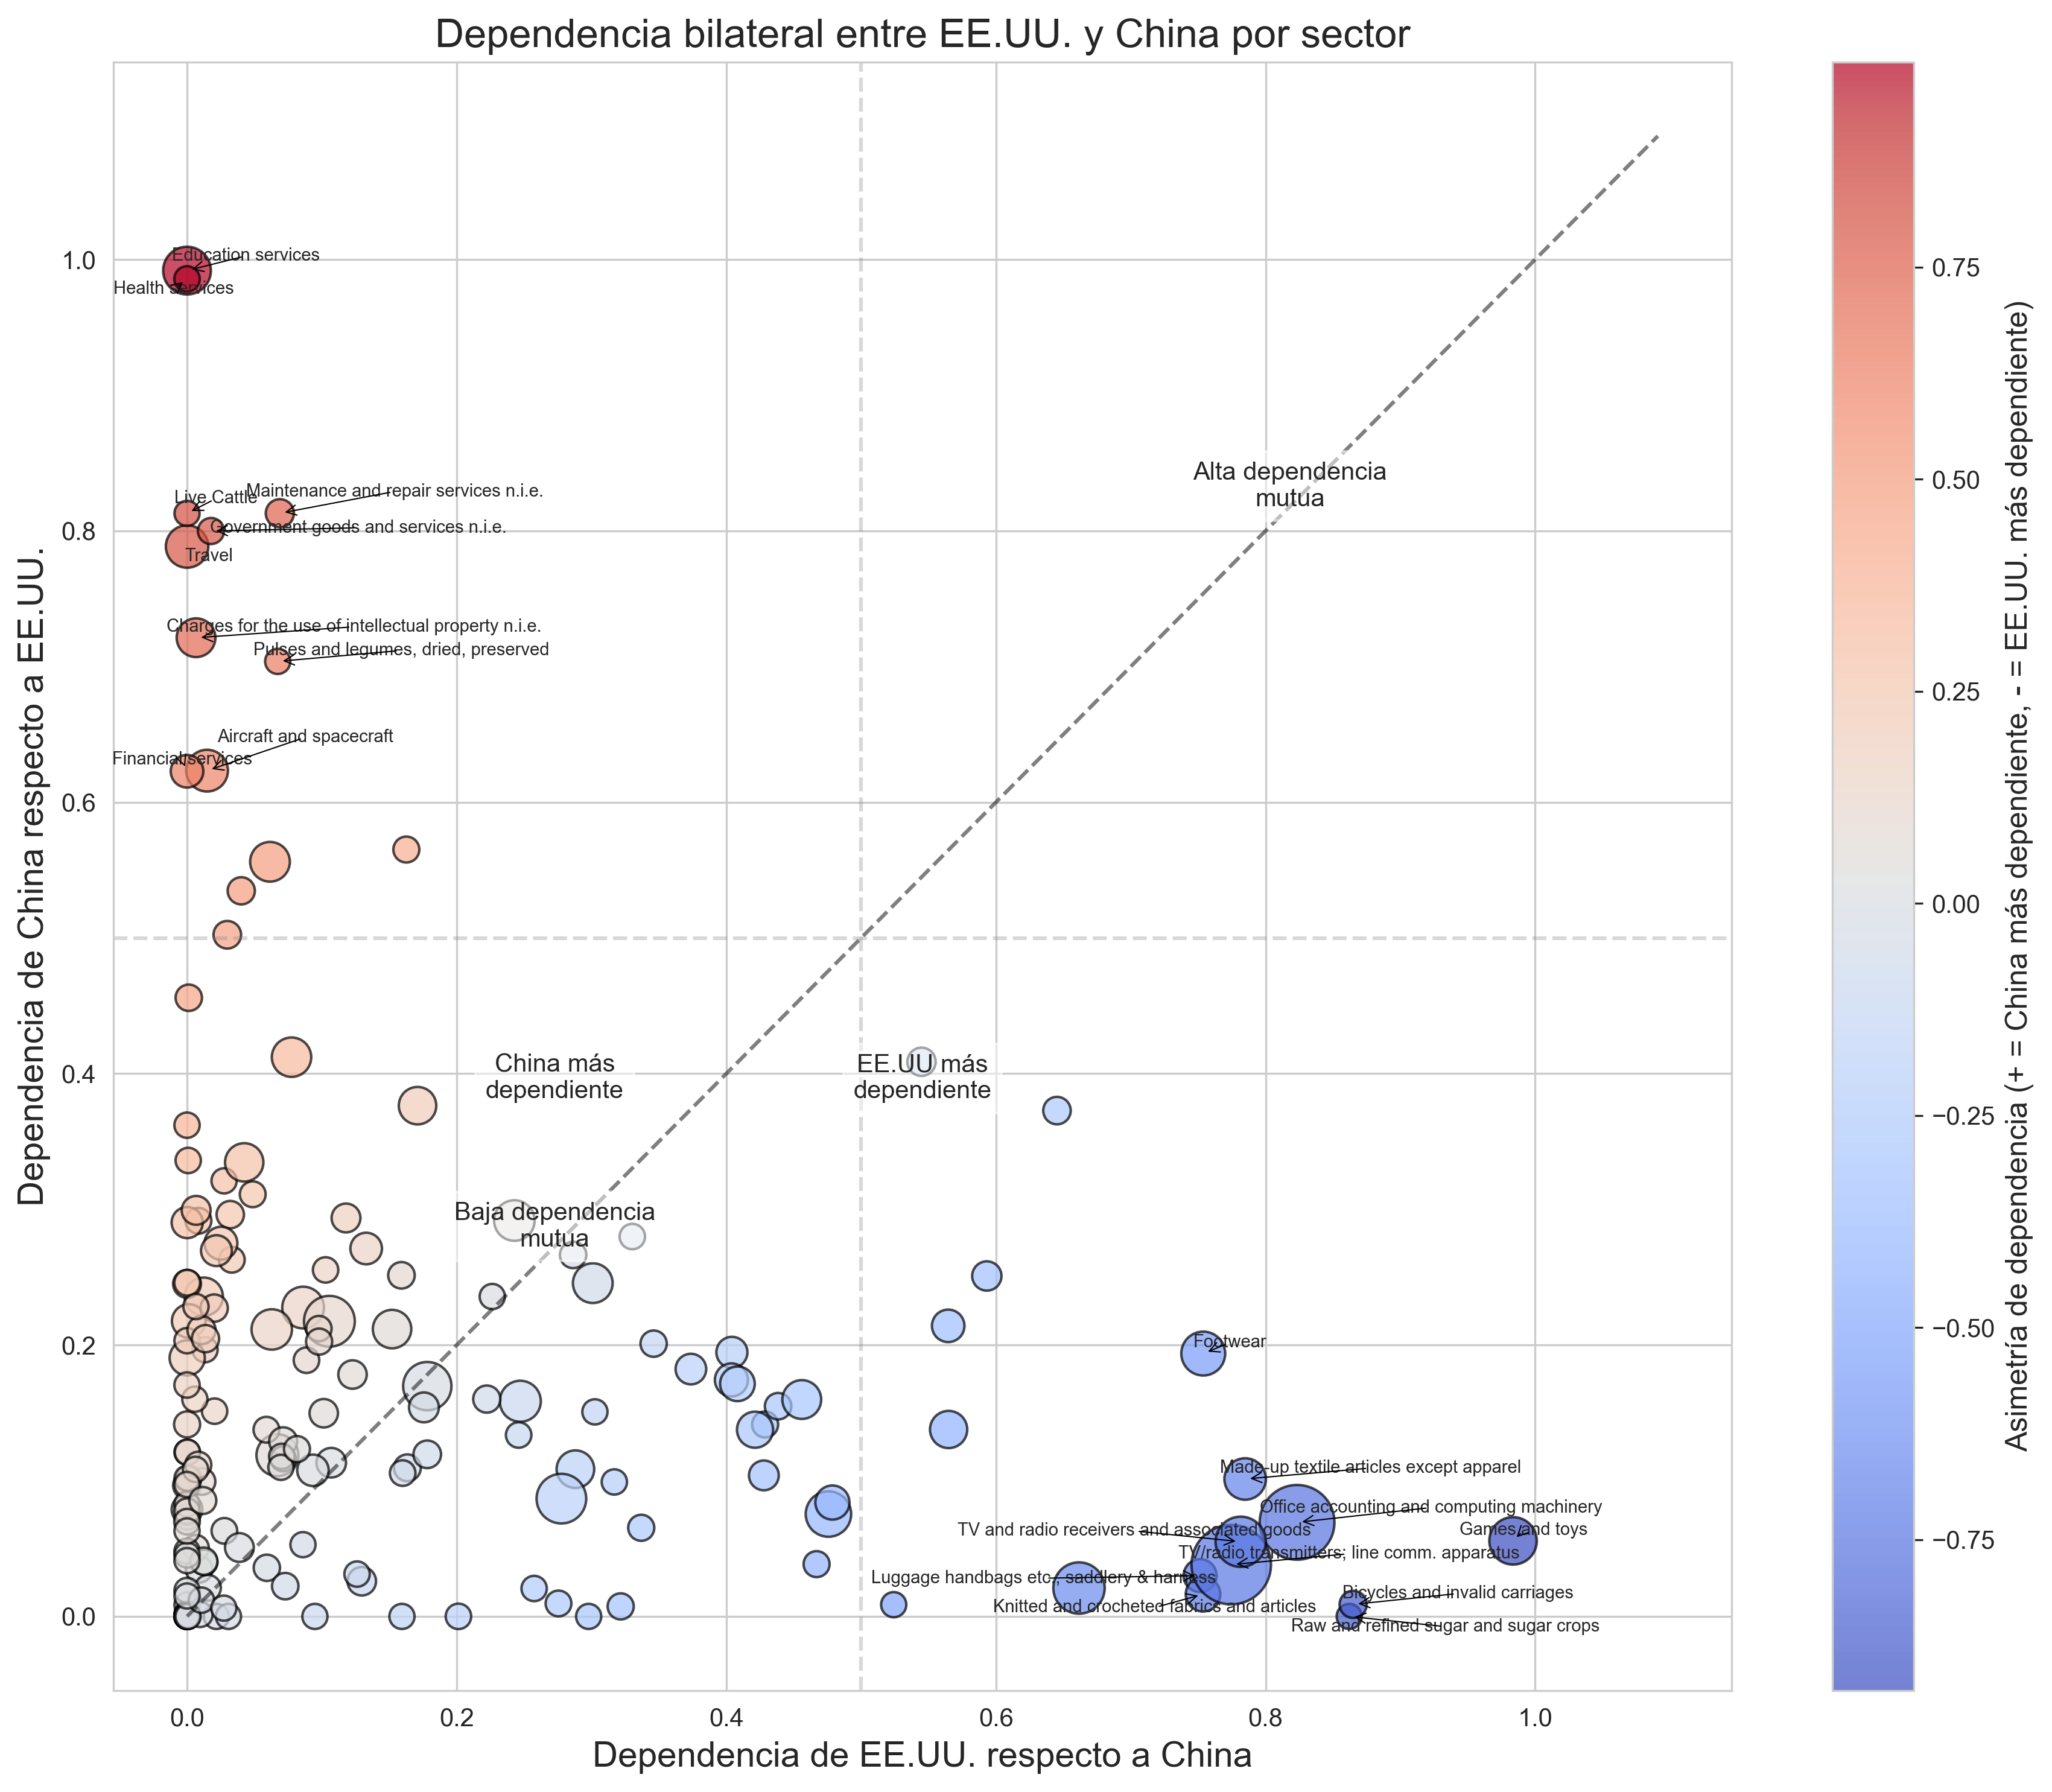

In [11]:
def analizar_dependencia_bilateral(df_full, sectores_estrategicos, output_path_fig):
    """
    Crea un gráfico de dispersión que muestra la dependencia directa entre
    EE.UU. y China, destacando los sectores con mayor dependencia.
    
    Args:
        df_full: DataFrame con datos de dependencia
        sectores_estrategicos: Lista de sectores a analizar (no se usa para filtrar)
        output_path_fig: Ruta para guardar visualizaciones
    """
    # Importar adjustText para evitar solapamiento de etiquetas
    from adjustText import adjust_text
    
    # Filtrar datos para obtener dependencia directa en ambas direcciones
    # Ya no filtramos por sectores estratégicos
    usa_china_data = df_full[(df_full['dependent_country'] == 'USA') & 
                           (df_full['supplier_country'] == 'CHN')]
    
    china_usa_data = df_full[(df_full['dependent_country'] == 'CHN') & 
                           (df_full['supplier_country'] == 'USA')]
    
    # Obtener todos los sectores únicos entre ambos conjuntos
    todos_sectores = set(usa_china_data['industry'].unique()).union(set(china_usa_data['industry'].unique()))
    
    # Preparar datos para el gráfico
    plot_data = []
    
    for sector in todos_sectores:
        # Obtener dependencia de EE.UU. respecto a China
        usa_dep = usa_china_data[usa_china_data['industry'] == sector]['dependency_value'].mean()
        # Obtener dependencia de China respecto a EE.UU.
        china_dep = china_usa_data[china_usa_data['industry'] == sector]['dependency_value'].mean()
        
        # Solo incluir sectores con datos en ambas direcciones
        if not np.isnan(usa_dep) and not np.isnan(china_dep):
            # Calcular volumen comercial total
            usa_vol = usa_china_data[usa_china_data['industry'] == sector]['trade_value'].sum()
            china_vol = china_usa_data[china_usa_data['industry'] == sector]['trade_value'].sum()
            total_vol = usa_vol + china_vol
            
            # Calcular asimetría (valores positivos = China más dependiente)
            asimetria = china_dep - usa_dep
            
            plot_data.append({
                'sector': sector,
                'dependencia_usa': usa_dep,
                'dependencia_china': china_dep,
                'volumen_comercial': total_vol,
                'asimetria': asimetria
            })
    
    # Crear DataFrame
    df_plot = pd.DataFrame(plot_data)
    
    # Identificar casos extremos (los 5 más asimétricos en cada dirección)
    extremos_usa = df_plot.nsmallest(10, 'asimetria')['sector'].tolist()  # EE.UU. más dependiente
    extremos_china = df_plot.nlargest(10, 'asimetria')['sector'].tolist()  # China más dependiente
    
    
    # Crear visualización
    plt.figure(figsize=(12, 10))
    
    # Normalizar tamaño para mejor visualización
    min_size = 100
    max_size = 1000
    if df_plot['volumen_comercial'].max() > 0:
        size_scale = df_plot['volumen_comercial'] / df_plot['volumen_comercial'].max() * (max_size - min_size) + min_size
    else:
        size_scale = [min_size] * len(df_plot)
    
    # Crear scatter plot con colormap basado en asimetría
    scatter = plt.scatter(
        df_plot['dependencia_usa'],
        df_plot['dependencia_china'],
        s=size_scale,
        c=df_plot['asimetria'],
        cmap='coolwarm',
        alpha=0.7,
        edgecolors='black',
        linewidth=1
    )
    
    # Identificar los 10 sectores con mayor dependencia en cada dirección
    top_usa_dep = df_plot.nlargest(10, 'dependencia_usa')
    top_china_dep = df_plot.nlargest(10, 'dependencia_china')

    # Sectores a etiquetar (unión de ambos conjuntos)
    sectores_a_etiquetar = set(top_usa_dep['sector']).union(set(top_china_dep['sector']))
    
    # Preparar lista para adjust_text
    texts = []
    
    # Añadir etiquetas solo a los sectores seleccionados
    for i, row in df_plot.iterrows():
        if row['sector'] in sectores_a_etiquetar:
            text = plt.text(
                row['dependencia_usa'],
                row['dependencia_china'],
                row['sector'],
                fontsize=7,
                ha='center'
            )
            texts.append(text)
    
    # Ajustar posición de las etiquetas para evitar solapamiento
    adjust_text(
        texts,
        arrowprops=dict(arrowstyle='->', color='black', lw=0.5),
        expand_points=(1.5, 1.5),
        force_points=(0.1, 0.1)
    )
    
    # Añadir línea diagonal de referencia (dependencia simétrica)
    max_val = max(df_plot['dependencia_usa'].max(), df_plot['dependencia_china'].max()) * 1.1
    plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Dependencia simétrica')
    
    # Añadir etiquetas y título
    plt.xlabel('Dependencia de EE.UU. respecto a China', fontsize=14)
    plt.ylabel('Dependencia de China respecto a EE.UU.', fontsize=14)
    plt.title('Dependencia bilateral entre EE.UU. y China por sector', fontsize=16)
    
    # Añadir colorbar para asimetría
    cbar = plt.colorbar(scatter)
    cbar.set_label('Asimetría de dependencia (+ = China más dependiente, - = EE.UU. más dependiente)', fontsize=12)
    
    # Etiquetar regiones del gráfico
    plt.text(max_val*0.50, max_val*0.35, 'EE.UU más\ndependiente', 
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(max_val*0.25, max_val*0.35, 'China más\ndependiente', 
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(max_val*0.75, max_val*0.75, 'Alta dependencia\nmutua', 
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(max_val*0.25, max_val*0.25, 'Baja dependencia\nmutua', 
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    
    # Añadir líneas de referencia en 0.5
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
    
    # Guardar figura
    plt.tight_layout()
    plt.savefig(output_path_fig / "dependencia_bilateral_eeuu_china.png", dpi=300, bbox_inches='tight')
    print(f"Gráfico guardado en: {output_path_fig / 'dependencia_bilateral_eeuu_china.png'}")
    
    # También imprimir casos extremos para análisis
    print("\nSectores donde EE.UU. es más dependiente de China:")
    for sector in extremos_usa:
        row = df_plot[df_plot['sector'] == sector].iloc[0]
        print(f"- {sector}: EE.UU. ({row['dependencia_usa']:.3f}) vs China ({row['dependencia_china']:.3f})")
    
    print("\nSectores donde China es más dependiente de EE.UU.:")
    for sector in extremos_china:
        row = df_plot[df_plot['sector'] == sector].iloc[0]
        print(f"- {sector}: China ({row['dependencia_china']:.3f}) vs EE.UU. ({row['dependencia_usa']:.3f})")
    
    return df_plot

# Para ejecutar:
resultados_dependencia = analizar_dependencia_bilateral(
    df_full, 
    sectores_estrategicos, 
    output_path_fig
)

## 1.2. Diagrama de red de dependencias indirectas
Descripción: Una visualización de red que muestre las dependencias directas e indirectas entre ambos países.
Elementos:
•	Nodos centrales: China y EE.UU.
•	Nodos secundarios: Países intermediarios clave
•	Grosor de conexiones: Fuerza de dependencia
•	Color de conexiones: Tipo de dependencia (directa/indirecta)
•	Distribución espacial: Proximidad indica mayor interdependencia
Valor analítico: Revela rutas de dependencia ocultas y países que funcionan como intermediarios clave en la relación comercial.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28440\1223112939.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='indirect_dependency_score', y='country', data=df_indirect_dependency, palette="viridis")


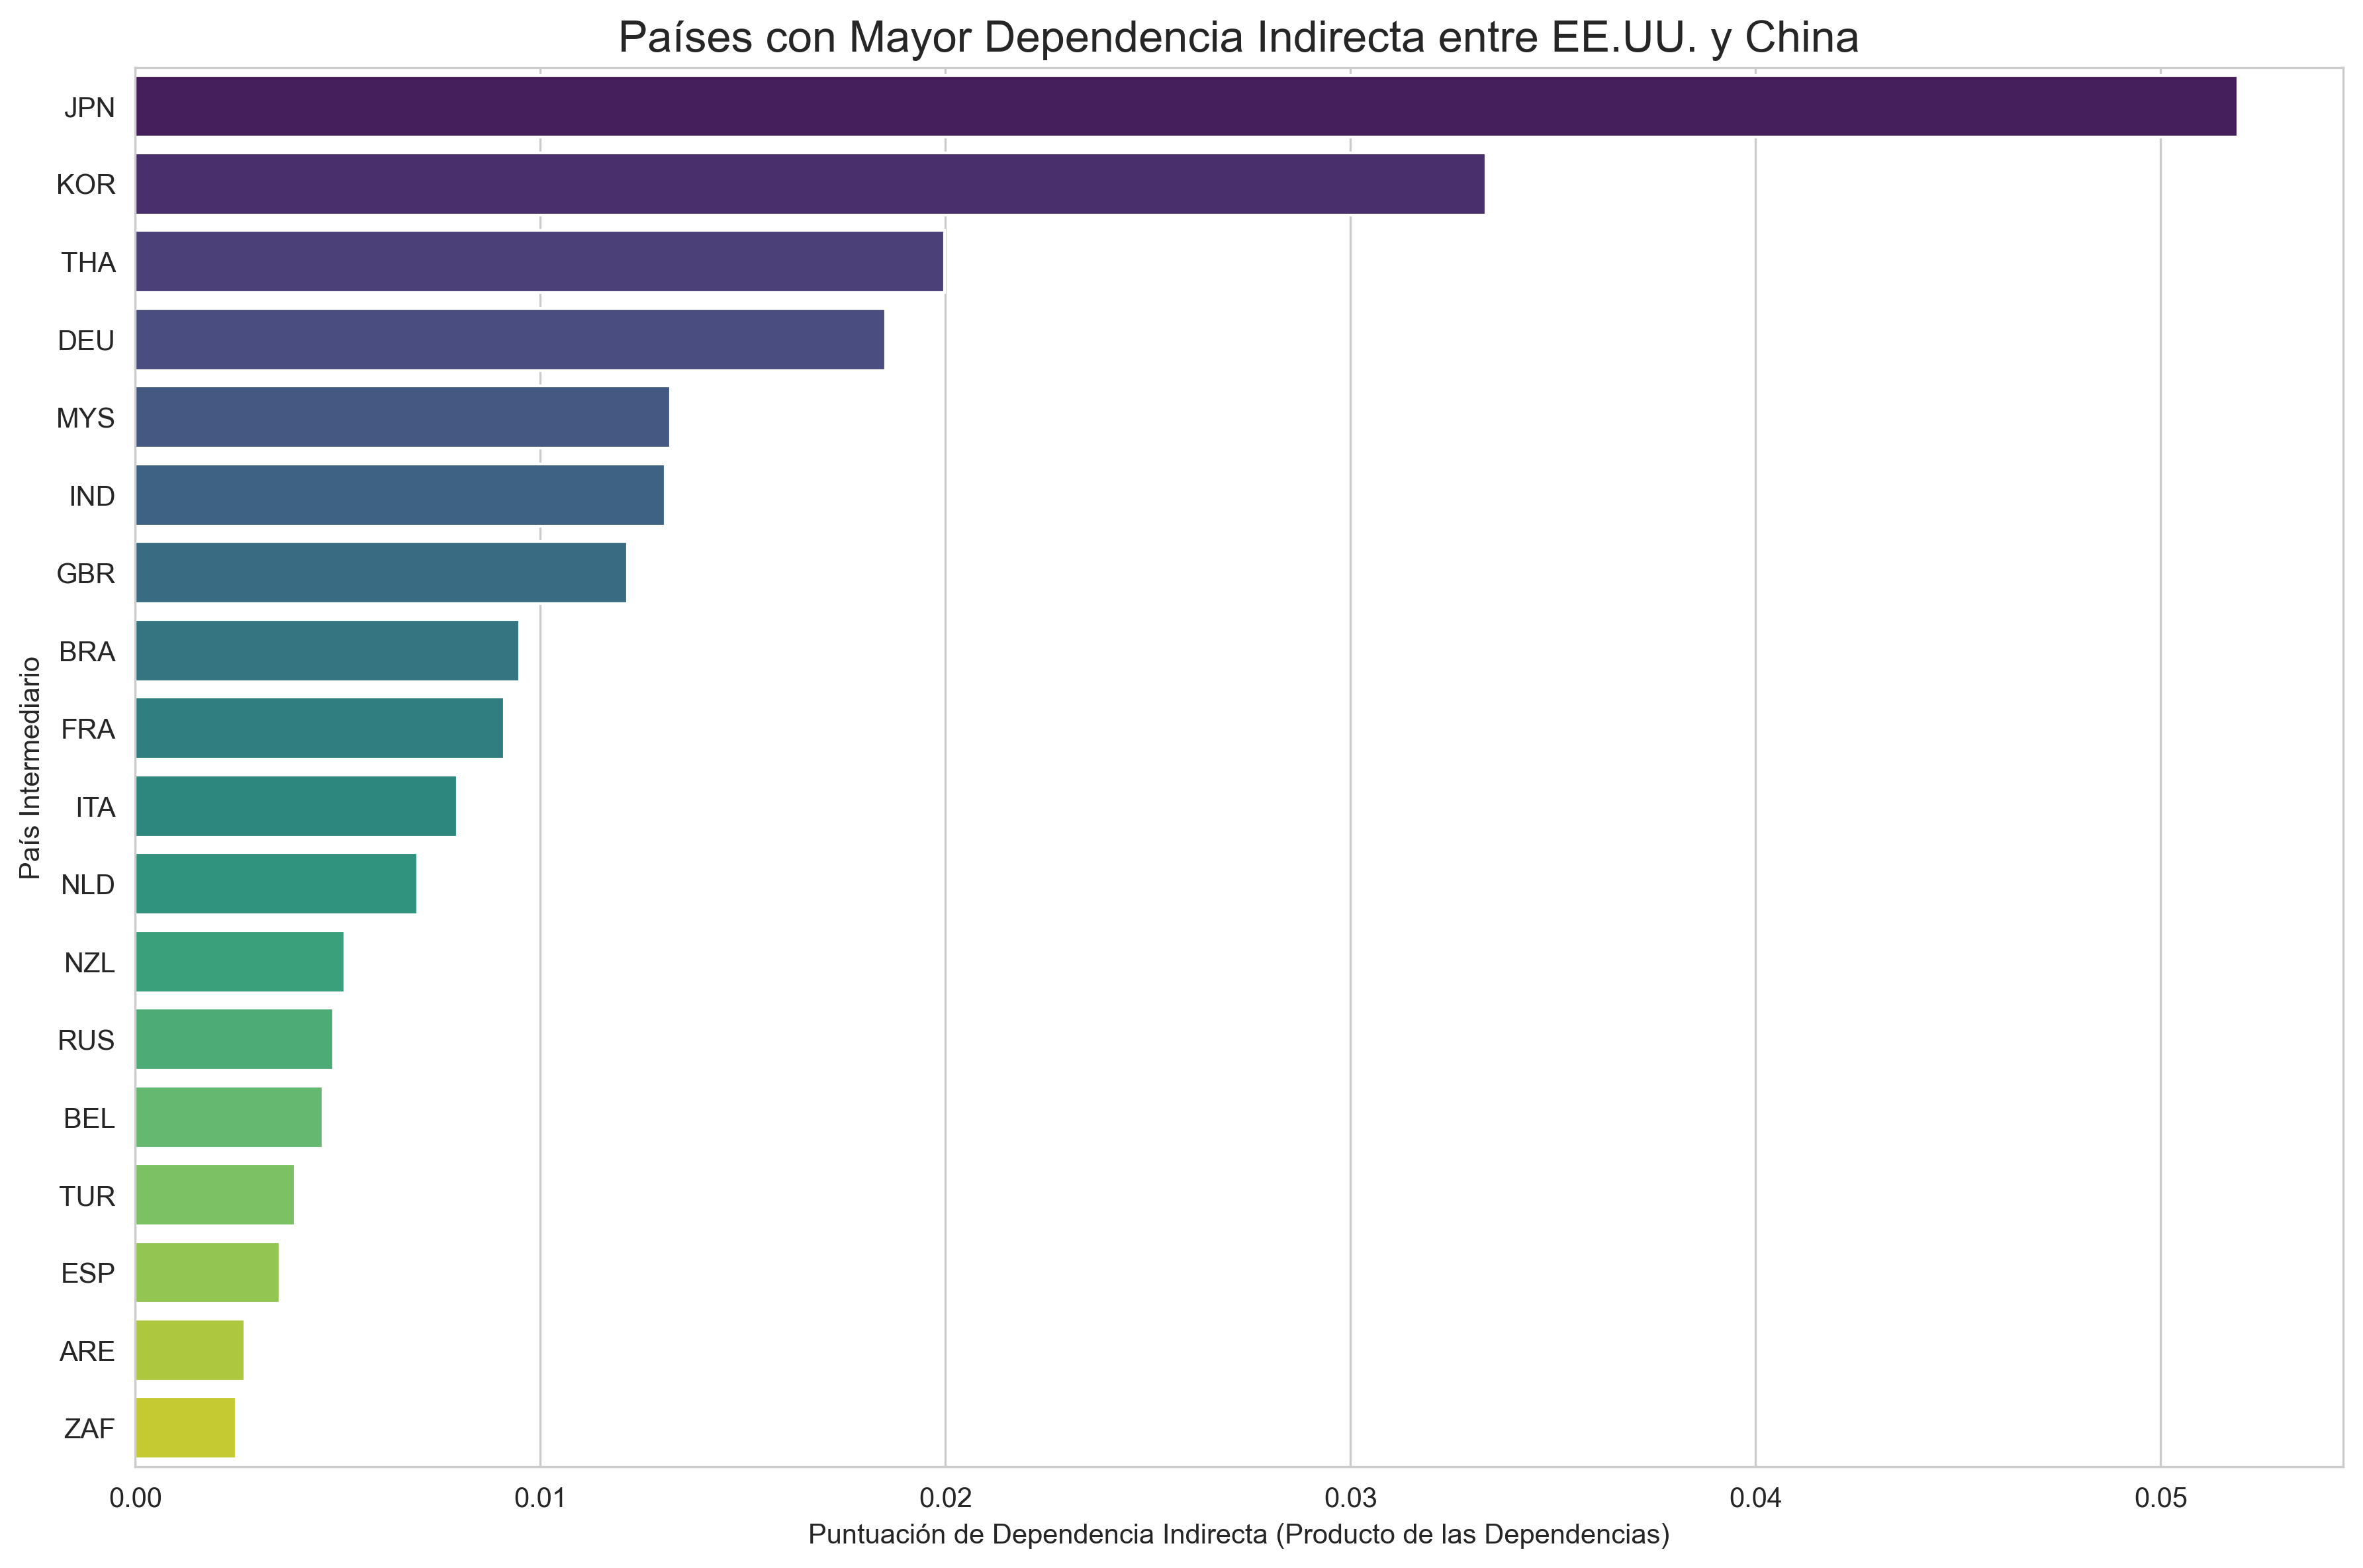

Gráfico de dependencia indirecta guardado en: c:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\Chimérica\figures\dependencia_indirecta_usa_china.png

Top países con mayor dependencia indirecta:
   country  indirect_dependency_score
9      JPN                   0.051909
17     KOR                   0.033350
12     THA                   0.019976
1      DEU                   0.018518
15     MYS                   0.013219
2      IND                   0.013090
0      GBR                   0.012160
14     BRA                   0.009492
3      FRA                   0.009117
10     ITA                   0.007951
4      NLD                   0.006972
11     NZL                   0.005176
16     RUS                   0.004900
7      BEL                   0.004640
8      TUR                   0.003949
13     ESP                   0.003575
6      ARE                   0.002704
5      ZAF                   0.002503


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

def calcular_dependencia_indirecta(df_full, df_intermediary, top_n_intermediaries=20):
    """
    Calcula una métrica de dependencia indirecta entre EE.UU. y China
    a través de países intermediarios.

    Args:
        df_full: DataFrame con datos de dependencia.
        df_intermediary: DataFrame con datos de intermediarios.
        top_n_intermediaries: Número de principales intermediarios a considerar.

    Returns:
        DataFrame con los principales intermediarios y su puntuación de dependencia indirecta.
    """
    # 1. Identificar los principales intermediarios
    intermediaries_data = df_intermediary.copy()
    top_intermediaries = intermediaries_data.groupby('country')['centrality_score'].mean().nlargest(top_n_intermediaries)
    top_countries = top_intermediaries.index.tolist()

    # Asegurarse de que EE.UU. y China estén incluidos (para el contexto)
    if 'USA' not in top_countries:
        top_countries.append('USA')
    if 'CHN' not in top_countries:
        top_countries.append('CHN')

    indirect_dependency = []
    for country in top_countries:
        if country not in ['USA', 'CHN']:
            # Dependencia indirecta EE.UU. -> Intermediario -> China
            usa_to_inter = df_full[(df_full['supplier_country'] == 'USA') &
                                    (df_full['dependent_country'] == country)]['dependency_value'].mean()
            inter_to_china = df_full[(df_full['supplier_country'] == country) &
                                      (df_full['dependent_country'] == 'CHN')]['dependency_value'].mean()

            score_usa_china = (usa_to_inter * inter_to_china) if pd.notna(usa_to_inter) and pd.notna(inter_to_china) else 0

            # Dependencia indirecta China -> Intermediario -> EE.UU.
            china_to_inter = df_full[(df_full['supplier_country'] == 'CHN') &
                                    (df_full['dependent_country'] == country)]['dependency_value'].mean()
            inter_to_usa = df_full[(df_full['supplier_country'] == country) &
                                      (df_full['dependent_country'] == 'USA')]['dependency_value'].mean()

            score_china_usa = (china_to_inter * inter_to_usa) if pd.notna(china_to_inter) and pd.notna(inter_to_usa) else 0

            # Calcular una puntuación combinada (podrías usar otra métrica si prefieres)
            indirect_score = score_usa_china + score_china_usa

            indirect_dependency.append({'country': country, 'indirect_dependency_score': indirect_score})

    df_indirect = pd.DataFrame(indirect_dependency)
    df_indirect_sorted = df_indirect.sort_values(by='indirect_dependency_score', ascending=False)
    return df_indirect_sorted

# 2. Ejecutar la función para obtener los datos
df_indirect_dependency = calcular_dependencia_indirecta(df_full, df_intermediary, top_n_intermediaries=20)

# 3. Visualizar los resultados con un gráfico de barras "catchy"
plt.figure(figsize=(12, 8))
sns.barplot(x='indirect_dependency_score', y='country', data=df_indirect_dependency, palette="viridis")
plt.title('Países con Mayor Dependencia Indirecta entre EE.UU. y China', fontsize=16)
plt.xlabel('Puntuación de Dependencia Indirecta (Producto de las Dependencias)')
plt.ylabel('País Intermediario')
plt.tight_layout()
plt.savefig(output_path_fig / "dependencia_indirecta_usa_china.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Gráfico de dependencia indirecta guardado en: {output_path_fig / 'dependencia_indirecta_usa_china.png'}")
print("\nTop países con mayor dependencia indirecta:")
print(df_indirect_dependency)

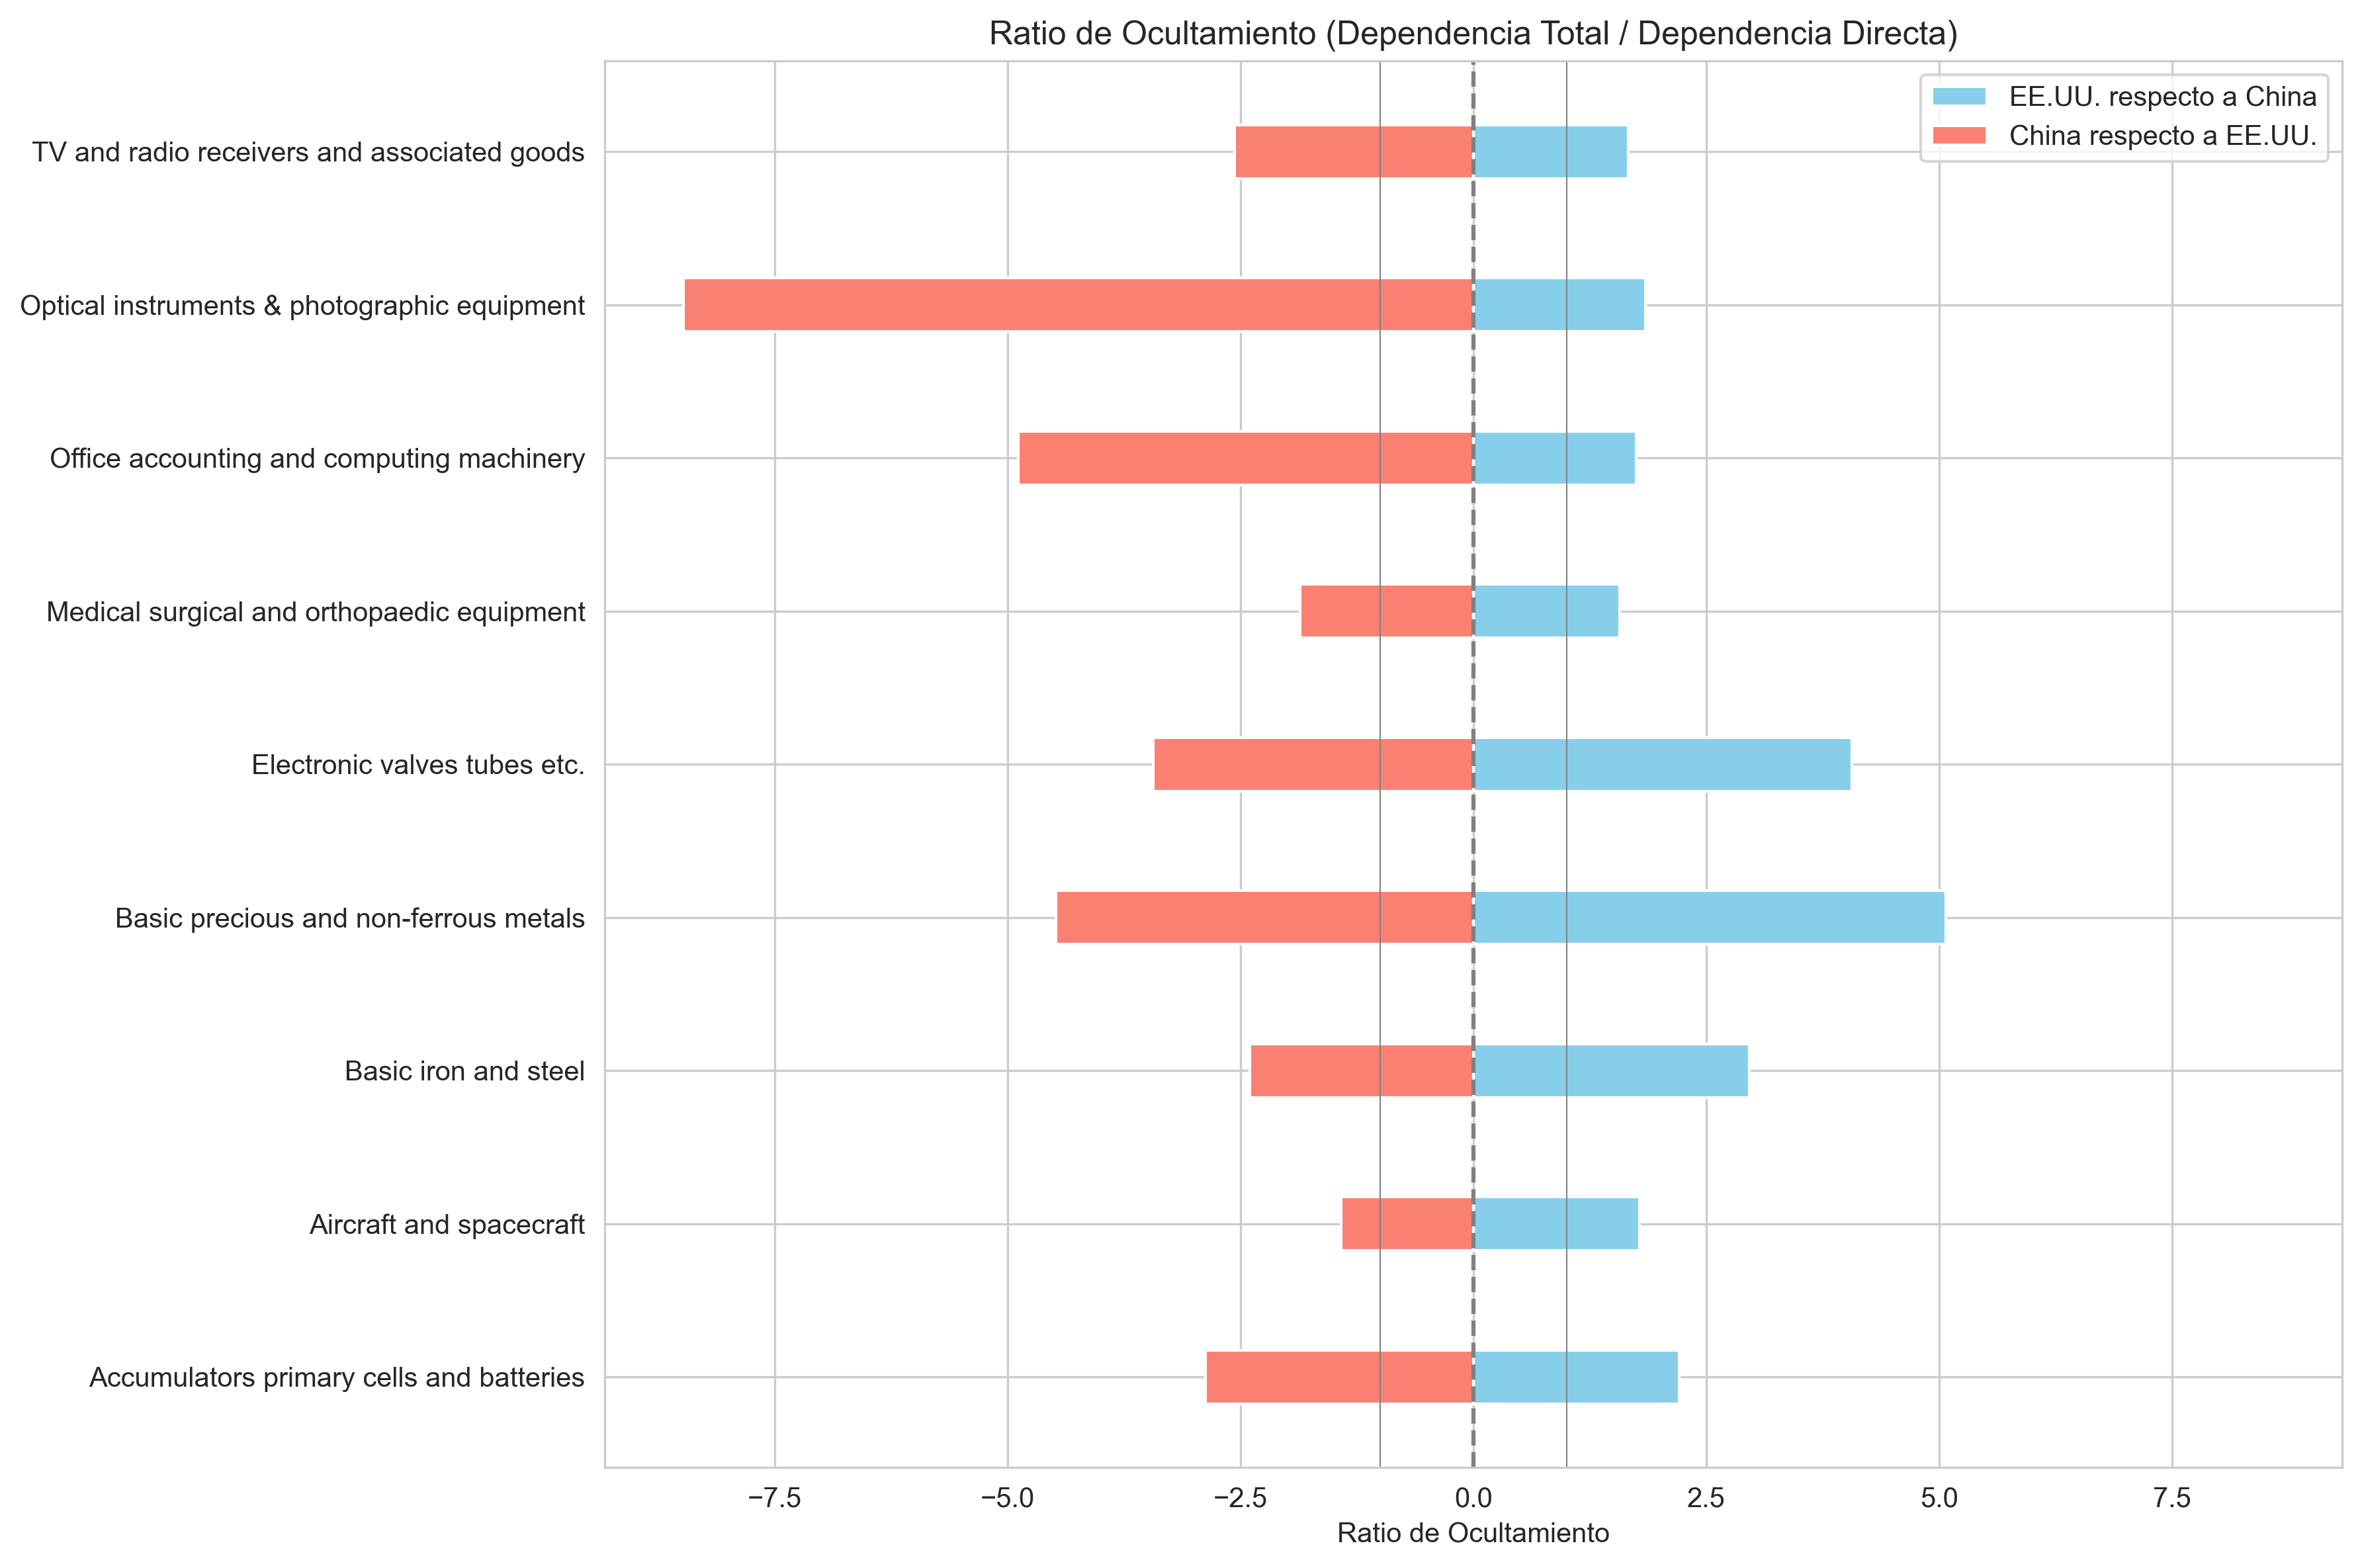

Gráfico de barras espejo guardado en: c:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\Chimérica\figures\ratio_ocultamiento_espejo.png


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def calcular_ratio_ocultamiento(df_full, sectores_estrategicos, output_path_fig):
    """
    Genera un gráfico de barras espejo para comparar el ratio de ocultamiento
    (dependencia total / dependencia directa) para EE.UU. y China.

    Args:
        df_full (pd.DataFrame): DataFrame con datos de dependencia.
        sectores_estrategicos (list): Lista de sectores estratégicos a analizar.
        output_path_fig (Path): Ruta para guardar la figura.
    """
    plot_data = []
    for sector in sectores_estrategicos:
        usa_china_sector = df_full[(df_full['dependent_country'] == 'USA') &
                                 (df_full['supplier_country'] == 'CHN') &
                                 (df_full['industry'] == sector)]
        china_usa_sector = df_full[(df_full['dependent_country'] == 'CHN') &
                                 (df_full['supplier_country'] == 'USA') &
                                 (df_full['industry'] == sector)]

        usa_total_dep = usa_china_sector['dependency_value'].mean()
        usa_direct_dep = usa_china_sector['direct_dependency'].mean()
        china_total_dep = china_usa_sector['dependency_value'].mean()
        china_direct_dep = china_usa_sector['direct_dependency'].mean()

        if pd.notna(usa_direct_dep) and usa_direct_dep != 0 and pd.notna(china_direct_dep) and china_direct_dep != 0:
            usa_ratio = usa_total_dep / usa_direct_dep
            china_ratio = china_total_dep / china_direct_dep
            plot_data.append({'sector': sector, 'usa_ratio': usa_ratio, 'china_ratio': china_ratio})

    df_plot = pd.DataFrame(plot_data)
    df_plot = df_plot.sort_values(by='sector', ascending=False)
    sectores = df_plot['sector'].tolist()
    usa_ratios = df_plot['usa_ratio'].tolist()
    china_ratios = [-r for r in df_plot['china_ratio'].tolist()] # Negativo para el lado izquierdo

    fig, ax = plt.subplots(figsize=(12, 8))

    bar_width = 0.35
    y_pos = np.arange(len(sectores))

    ax.barh(y_pos, usa_ratios, bar_width, color='skyblue', label='EE.UU. respecto a China')
    ax.barh(y_pos, china_ratios, bar_width, color='salmon', label='China respecto a EE.UU.')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(sectores)
    ax.invert_yaxis() # Sectores de arriba a abajo
    ax.set_xlabel('Ratio de Ocultamiento')
    ax.set_title('Ratio de Ocultamiento (Dependencia Total / Dependencia Directa)')
    ax.legend(loc='upper right')

    # Ajustar límites para mostrar ambos lados
    max_ratio = max(df_plot['usa_ratio'].max(), df_plot['china_ratio'].max()) * 1.1
    ax.set_xlim(-max_ratio, max_ratio)

    # Añadir una línea vertical en el centro (ratio 1)
    ax.axvline(0, color='gray', linestyle='--')
    ax.axvline(1, color='gray', linestyle='-', linewidth=0.5)
    ax.axvline(-1, color='gray', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(output_path_fig / "ratio_ocultamiento_espejo.png", dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Gráfico de barras espejo guardado en: {output_path_fig / 'ratio_ocultamiento_espejo.png'}")

# Definir rutas (ajusta según tu estructura de archivos)
current_dir = Path.cwd()
base_path = current_dir.parent.parent.parent
files_path = base_path / "data" / "processed" / "ficheros_paper"
output_path_fig = current_dir / "figures"

# Cargar datos
df_full = pd.read_csv(files_path / "dependencies_full.csv.gz", sep=";")

# Sectores estratégicos para el análisis (puedes ajustar esta lista)
sectores_estrategicos = [
    "Aircraft and spacecraft",
    "Accumulators primary cells and batteries",
    "Basic iron and steel",
    "Basic precious and non-ferrous metals",
    "Electronic valves tubes etc.",
    "TV and radio receivers and associated goods",
    "Office accounting and computing machinery",
    "Medical surgical and orthopaedic equipment",
    "Optical instruments & photographic equipment"
]

# Ejecutar la función para generar el gráfico de barras espejo
calcular_ratio_ocultamiento(df_full, sectores_estrategicos, output_path_fig)


## Dependencia de EEUU hacia China:Filtra df_dependencies_full.csv.gz por dependent_country='USA' y supplier_country='CHN'.

Identifica las industrias clave donde EEUU tiene la dependency_value (total) más alta respecto a China.

Analiza la proporción direct_dependency vs. indirect_dependency. Una alta dependencia indirecta significa que incluso si EEUU busca alternativas, sigue dependiendo de China a través de terceros países.

Examina weighted_dependencies.csv.gz para la relación USA-CHN para ver la dependencia ponderada por volumen comercial total.

Dependencia de China hacia EEUU:Repite el proceso anterior, pero filtrando por dependent_country='CHN' y supplier_country='USA'.

Esto te mostrará dónde China es más vulnerable a las acciones de EEUU (ej. semiconductores, software, ciertos productos agrícolas).

Qué generará el código:

Imprimirá mensajes sobre la carga de datos.
Mostrará dos gráficos para la dependencia de EEUU desde China:
Un gráfico de barras horizontales con las top_n industrias donde EEUU tiene mayor dependencia total de China.
Un gráfico de barras horizontales apiladas mostrando la proporción de dependencia directa e indirecta para esas mismas top_n industrias.
Mostrará dos gráficos similares para la dependencia de China desde EEUU.
Imprimirá los valores de la dependencia ponderada total entre EEUU y China, y viceversa, si encuentra el archivo weighted_dependencies.csv.gz.
Estos gráficos te darán una visión clara de las vulnerabilidades bilaterales directas por industria y la importancia relativa de las cadenas de suministro indirectas.

Cargando datos de dependencias completas desde: c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper\dependencies_full.csv.gz
Datos cargados exitosamente.

--- Analizando Dependencia de USA desde CHN ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28440\3797434152.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_total = sns.barplot(


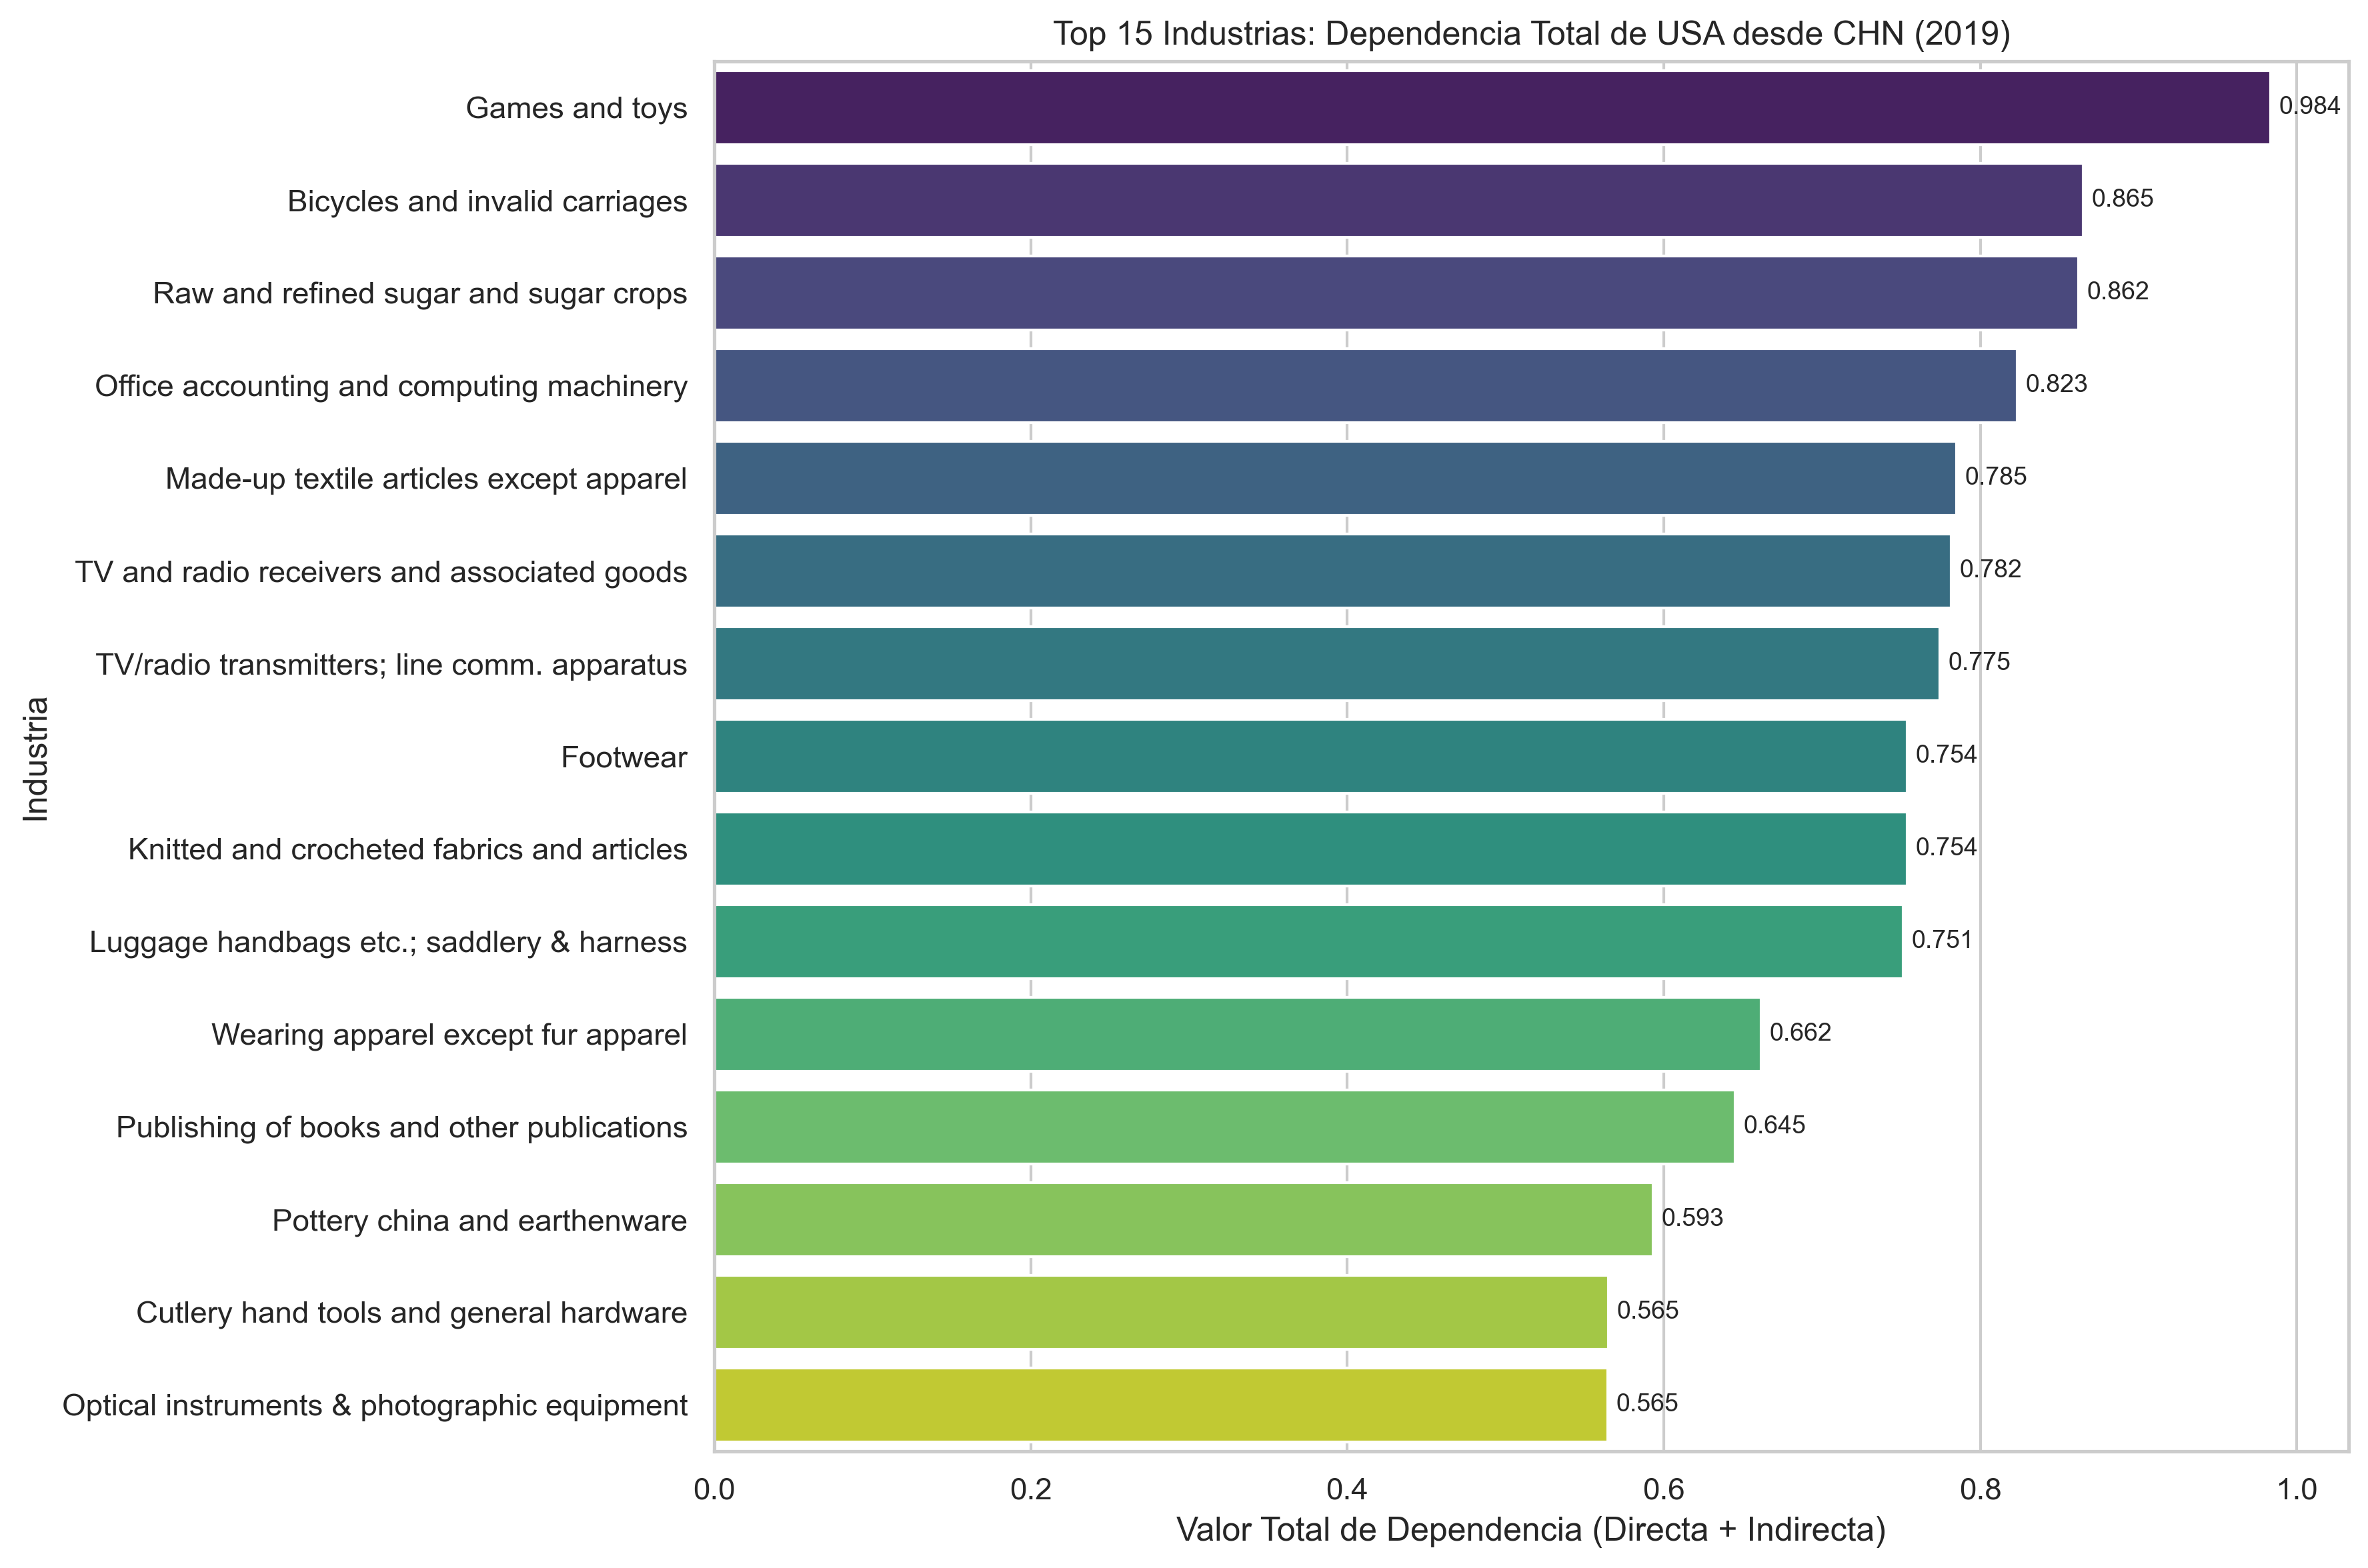

<Figure size 3600x2400 with 0 Axes>

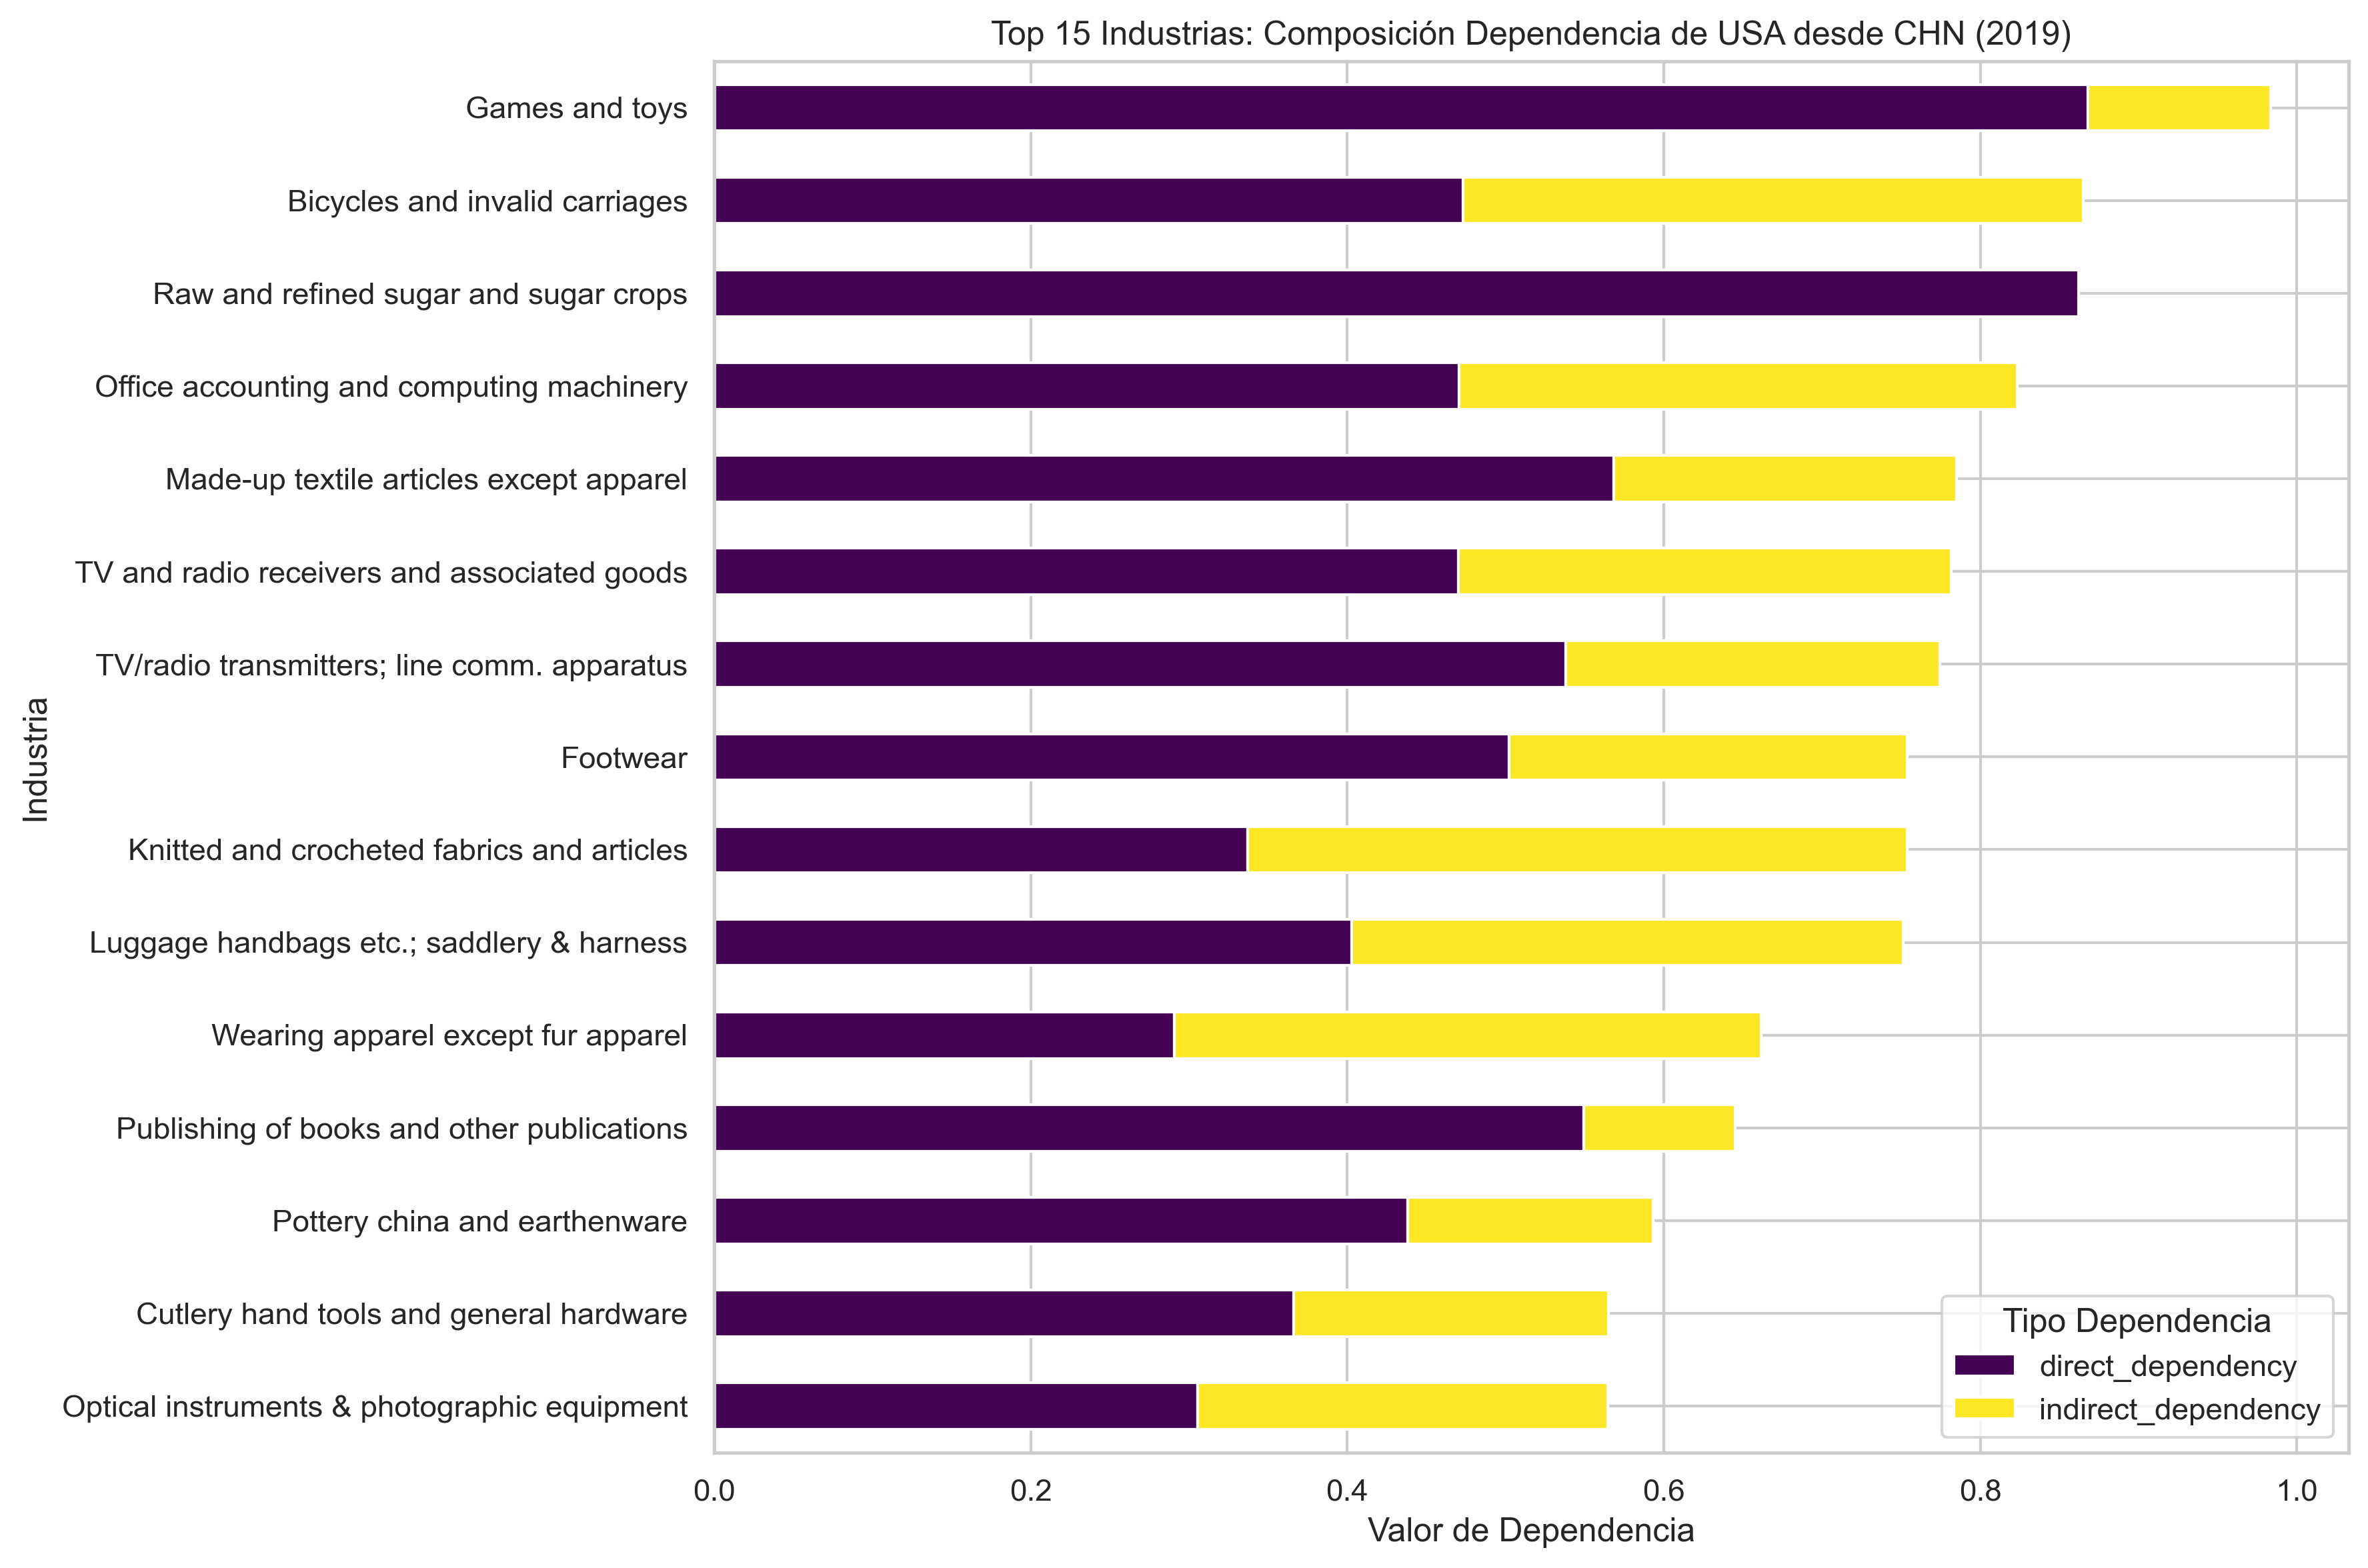


--- Analizando Dependencia de CHN desde USA ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28440\3797434152.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_total = sns.barplot(


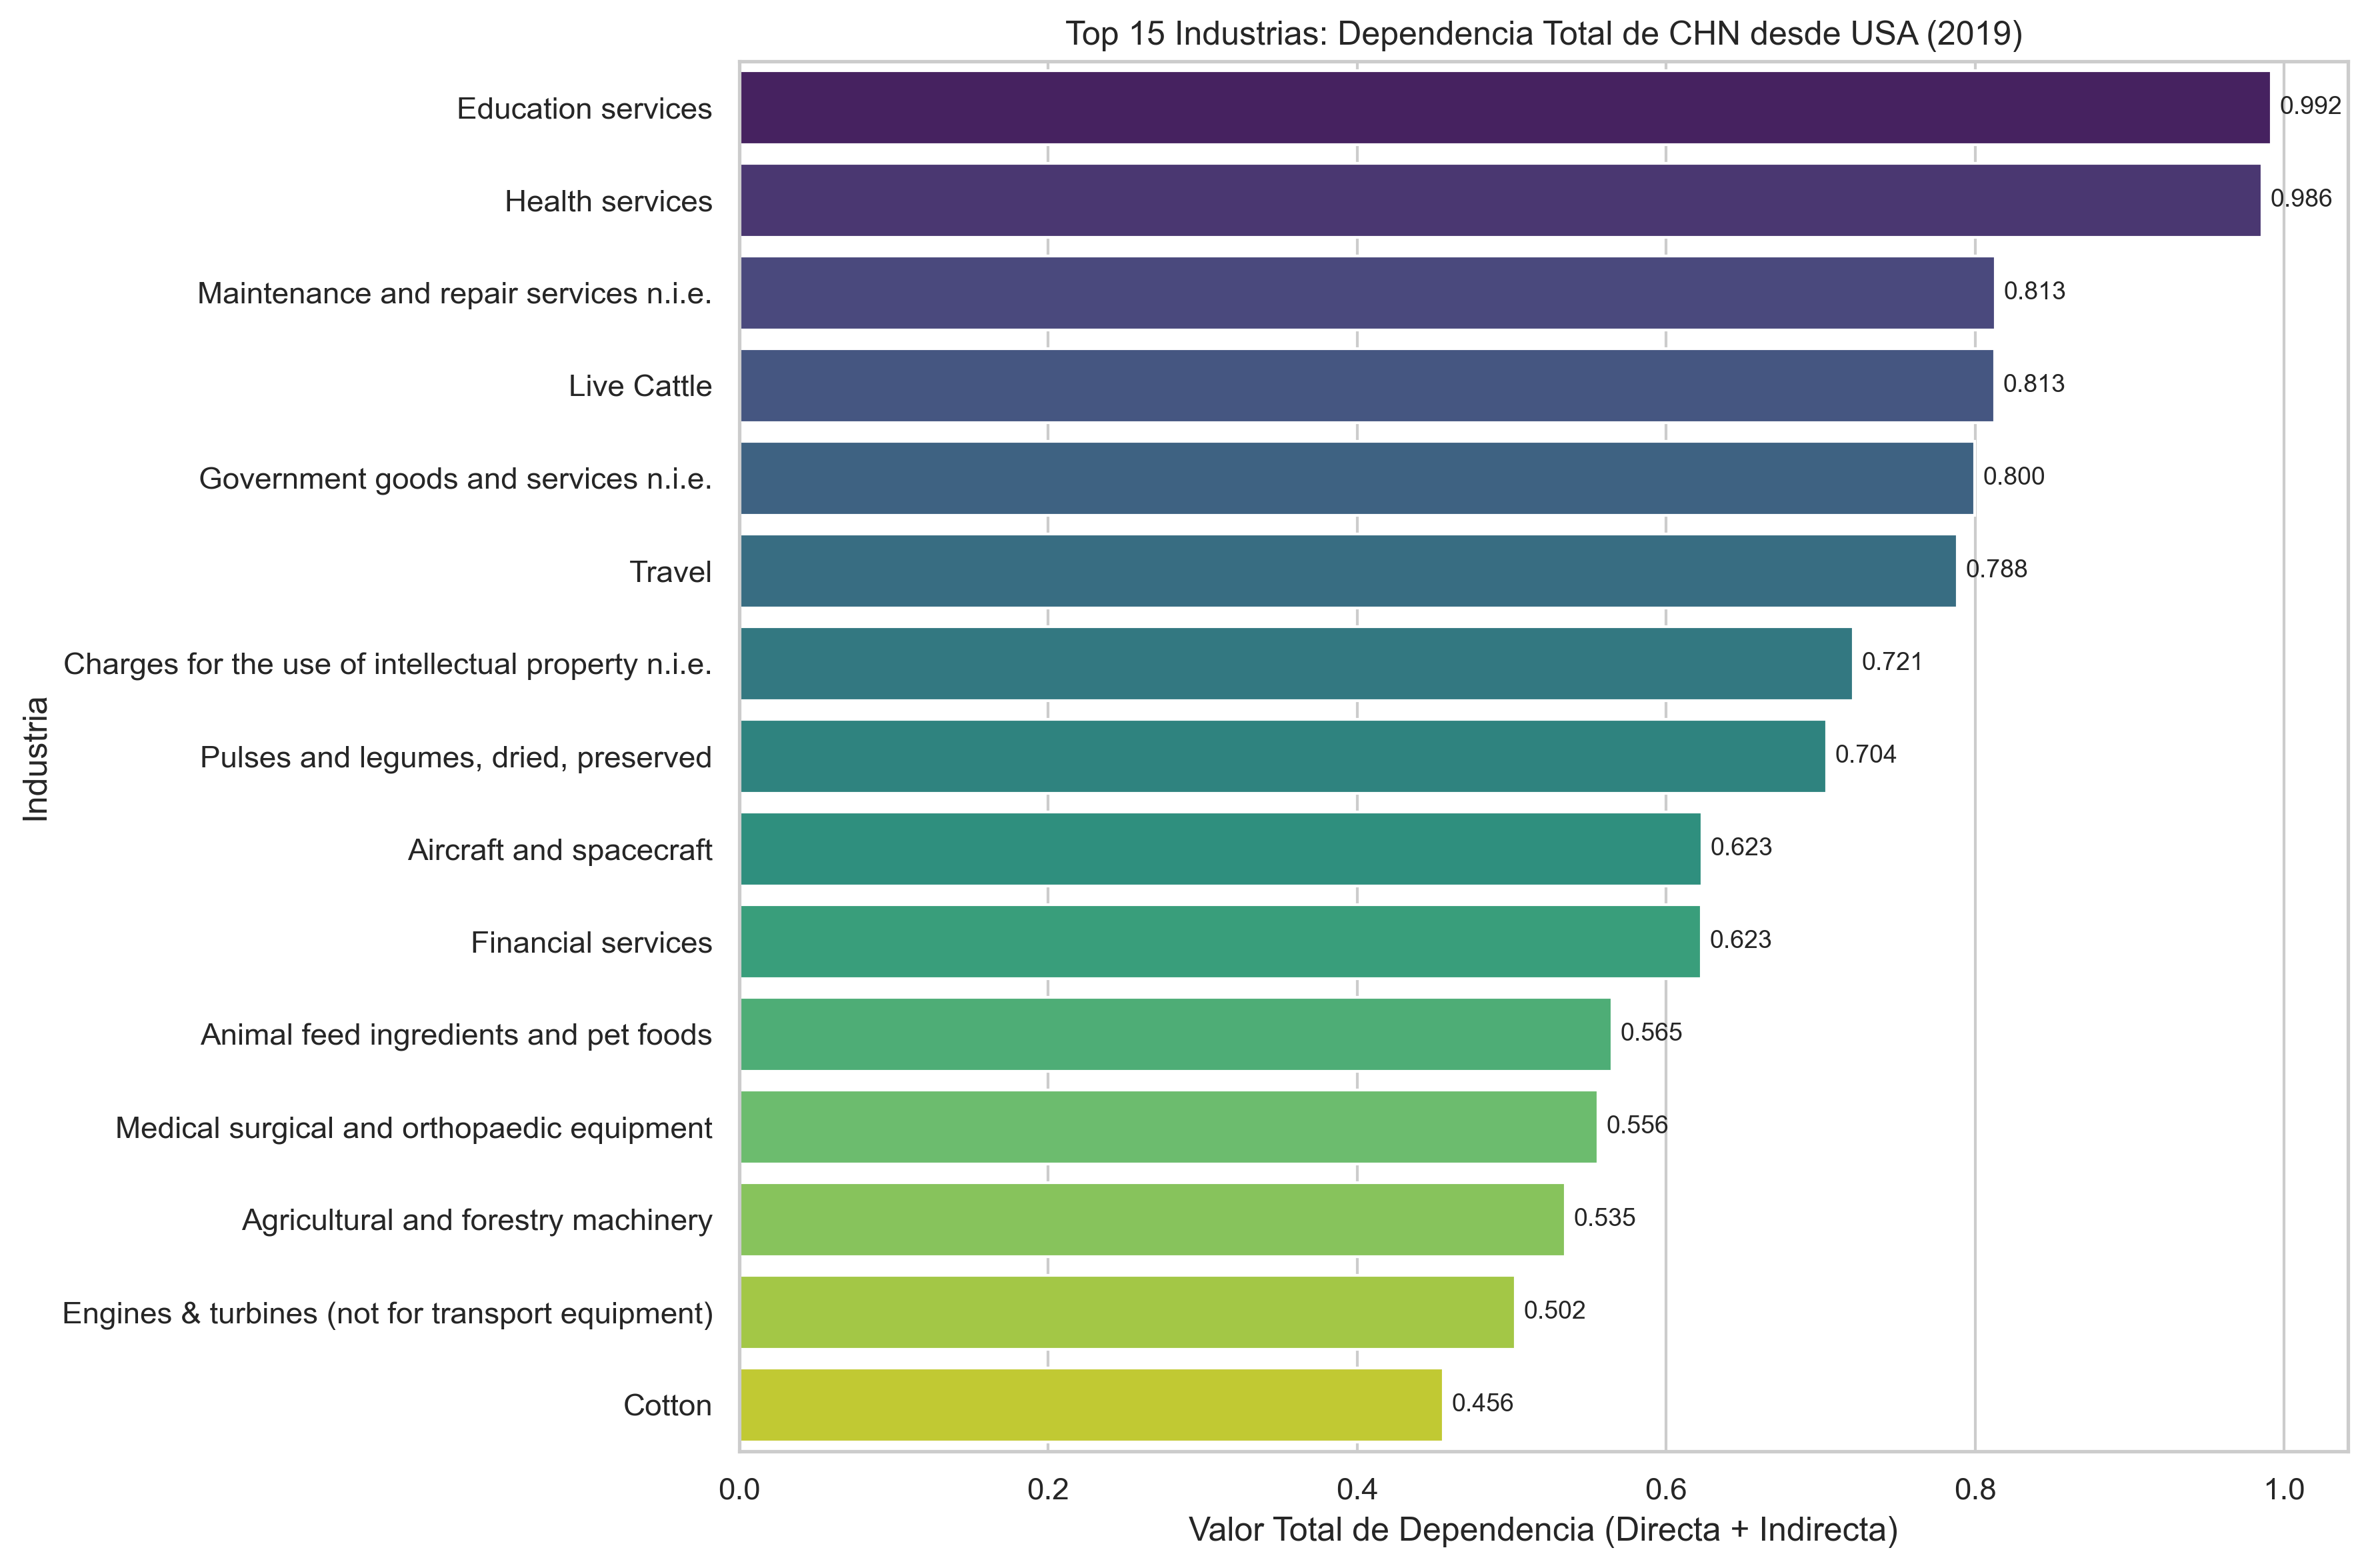

<Figure size 3600x2400 with 0 Axes>

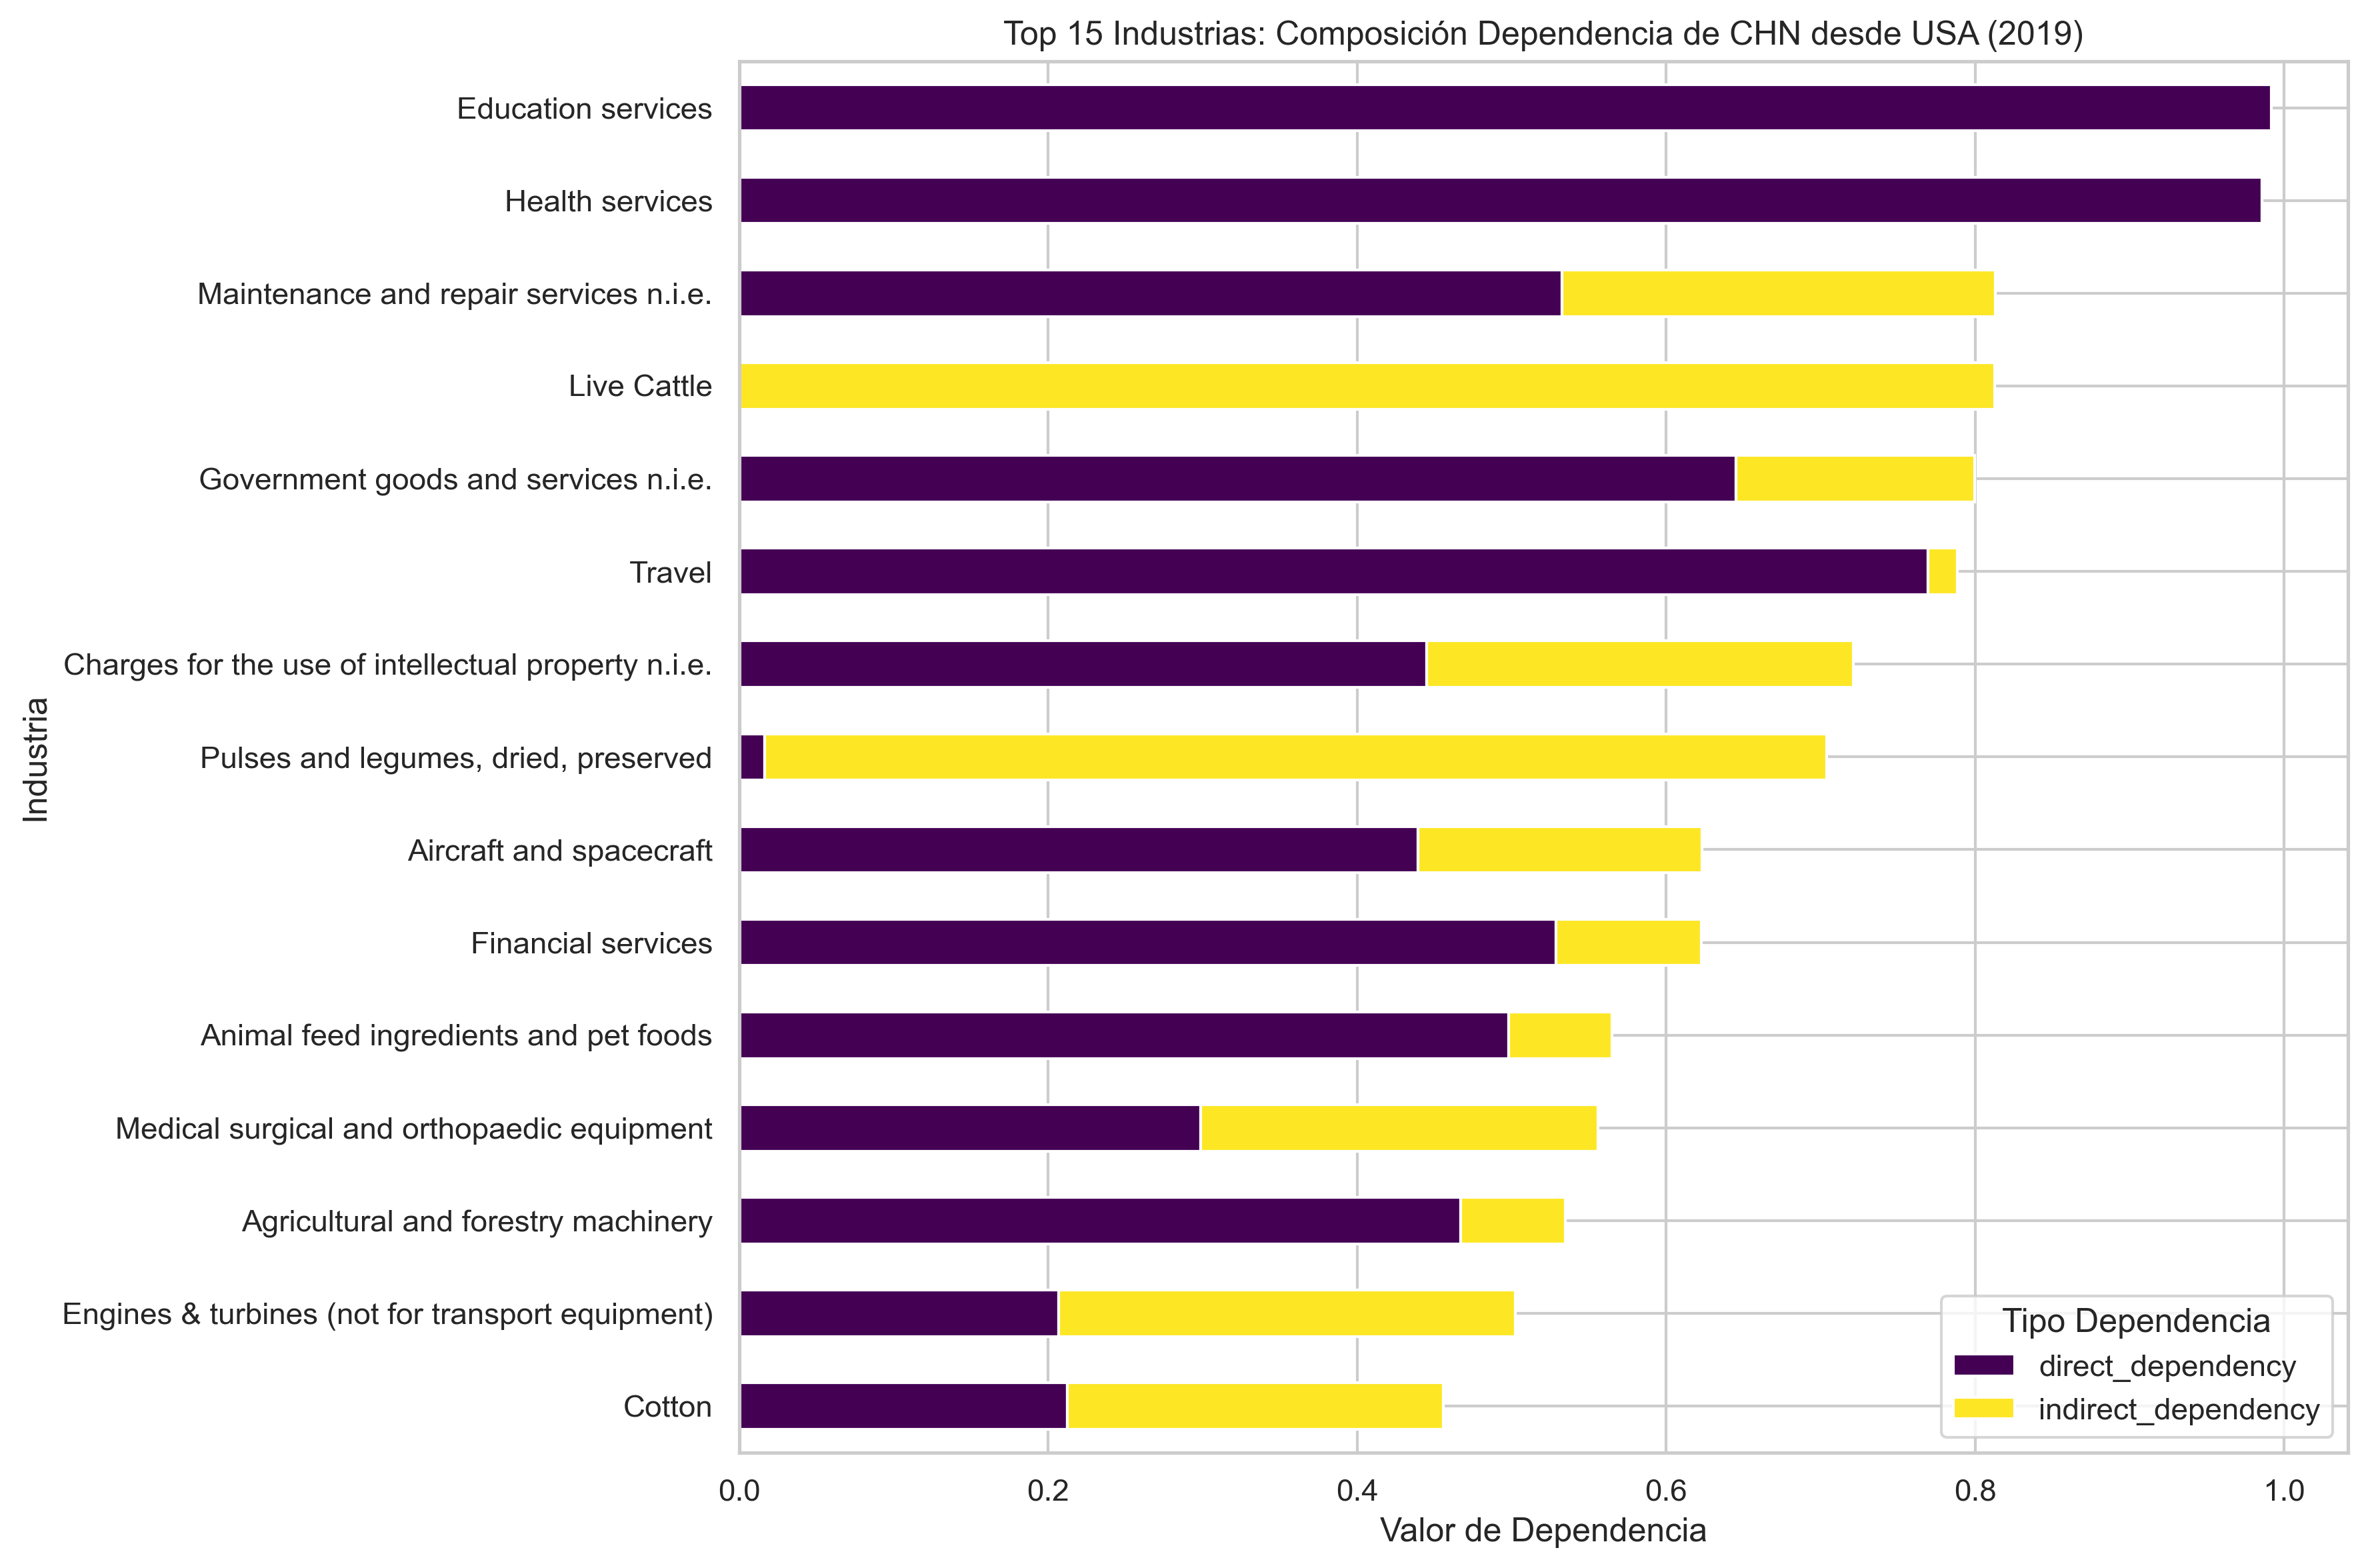


--- Dependencia Ponderada Bilateral (desde c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper\weighted_dependencies.csv.gz) ---
Datos de dependencias ponderadas cargados.
Dependencia Ponderada Total de USA desde CHN: 0.501462486011093
Dependencia Ponderada Total de CHN desde USA: 0.4245999837514094

Análisis de vulnerabilidades directas completado.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import os

# --- Configuración ---
# !! Ajusta estas rutas a la ubicación real de tus archivos !!
base_path = r"c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper"
dependencies_full_file = os.path.join(base_path, "dependencies_full.csv.gz")
weighted_dependencies_file = os.path.join(base_path, "weighted_dependencies.csv.gz")

# Países de interés (asegúrate de que coincidan con los códigos en tus datos, ej. ISO 3166-1 alpha-3)
country_dependent_us = 'USA'
country_supplier_us = 'CHN'
country_dependent_cn = 'CHN'
country_supplier_cn = 'USA'

# Número de industrias top a mostrar
top_n = 15

# Estilo de los gráficos
sns.set_theme(style="whitegrid")

# --- Funciones Auxiliares ---
def plot_top_dependencies(df_filtered, dependent, supplier, top_n):
    """
    Crea gráficos de barras para las top N dependencias: total y composición directa/indirecta.
    """
    if df_filtered.empty:
        print(f"No se encontraron datos de dependencia para {dependent} desde {supplier}.")
        return

    # Ordenar por dependencia total y seleccionar top N
    top_df = df_filtered.sort_values('dependency_value', ascending=False).head(top_n)

    # --- Gráfico 1: Dependencia Total ---
    plt.figure(figsize=(12, 8))
    barplot_total = sns.barplot(
        x='dependency_value',
        y='industry',
        data=top_df,
        palette='viridis'
    )
    plt.title(f'Top {top_n} Industrias: Dependencia Total de {dependent} desde {supplier} (2019)')
    plt.xlabel('Valor Total de Dependencia (Directa + Indirecta)')
    plt.ylabel('Industria')
    # Añadir etiquetas de valor a las barras
    for container in barplot_total.containers:
        barplot_total.bar_label(container, fmt='%.3f', padding=3, size=9)
    plt.tight_layout()
    plt.show()

    # --- Gráfico 2: Composición Directa vs. Indirecta ---
    # Preparar datos para stacked bar chart
    plot_data = top_df[['industry', 'direct_dependency', 'indirect_dependency']].set_index('industry')

    plt.figure(figsize=(12, 8))
    # Asegurarse de que el orden es el mismo que el gráfico anterior
    plot_data = plot_data.iloc[::-1] # Invertir para que coincida con barplot de seaborn
    plot_data.plot(kind='barh', stacked=True, colormap='viridis', figsize=(12, 8))

    plt.title(f'Top {top_n} Industrias: Composición Dependencia de {dependent} desde {supplier} (2019)')
    plt.xlabel('Valor de Dependencia')
    plt.ylabel('Industria')
    plt.legend(title='Tipo Dependencia', loc='lower right')
    plt.tight_layout()
    # Añadir etiquetas de valor total (opcional, puede ser complejo con stacked)
    # for index, value in enumerate(plot_data.sum(axis=1)):
    #     plt.text(value, index, f'{value:.3f}', va='center', ha='left', size=9)
    plt.show()


# --- Carga de Datos ---
print(f"Cargando datos de dependencias completas desde: {dependencies_full_file}")
try:
    with gzip.open(dependencies_full_file, 'rt', encoding='utf-8') as f:
        df_full = pd.read_csv(f, sep=';')
    print("Datos cargados exitosamente.")
    # Verificar nombres de columnas esperados
    expected_cols = ['industry', 'dependent_country', 'supplier_country', 'dependency_value', 'direct_dependency', 'indirect_dependency']
    if not all(col in df_full.columns for col in expected_cols):
        print(f"¡Advertencia! Faltan columnas esperadas. Columnas encontradas: {df_full.columns.tolist()}")
        # Intentar continuar si las columnas clave existen
        if not all(col in df_full.columns for col in ['dependent_country', 'supplier_country', 'dependency_value']):
             raise ValueError("Faltan columnas esenciales para el análisis.")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo {dependencies_full_file}")
    exit()
except Exception as e:
    print(f"Error cargando el archivo {dependencies_full_file}: {e}")
    exit()

# --- Análisis de Dependencia EEUU desde China ---
print(f"\n--- Analizando Dependencia de {country_dependent_us} desde {country_supplier_us} ---")
df_us_on_cn = df_full[
    (df_full['dependent_country'] == country_dependent_us) &
    (df_full['supplier_country'] == country_supplier_us)
].copy() # Usar .copy() para evitar SettingWithCopyWarning

plot_top_dependencies(df_us_on_cn, country_dependent_us, country_supplier_us, top_n)

# --- Análisis de Dependencia China desde EEUU ---
print(f"\n--- Analizando Dependencia de {country_dependent_cn} desde {country_supplier_cn} ---")
df_cn_on_us = df_full[
    (df_full['dependent_country'] == country_dependent_cn) &
    (df_full['supplier_country'] == country_supplier_cn)
].copy() # Usar .copy() para evitar SettingWithCopyWarning

plot_top_dependencies(df_cn_on_us, country_dependent_cn, country_supplier_cn, top_n)

# --- Dependencia Ponderada Bilateral ---
print(f"\n--- Dependencia Ponderada Bilateral (desde {weighted_dependencies_file}) ---")
try:
    with gzip.open(weighted_dependencies_file, 'rt', encoding='utf-8') as f:
        df_weighted = pd.read_csv(f, sep=';')
    print("Datos de dependencias ponderadas cargados.")

    # Filtrar para USA -> CHN
    weighted_us_cn = df_weighted[
        (df_weighted['dependent_country'] == country_dependent_us) &
        (df_weighted['supplier_country'] == country_supplier_us)
    ]['weighted_dependency'].iloc[0] if not df_weighted[
        (df_weighted['dependent_country'] == country_dependent_us) &
        (df_weighted['supplier_country'] == country_supplier_us)
    ].empty else "No encontrada"

    # Filtrar para CHN -> USA
    weighted_cn_us = df_weighted[
        (df_weighted['dependent_country'] == country_dependent_cn) &
        (df_weighted['supplier_country'] == country_supplier_cn)
    ]['weighted_dependency'].iloc[0] if not df_weighted[
        (df_weighted['dependent_country'] == country_dependent_cn) &
        (df_weighted['supplier_country'] == country_supplier_cn)
    ].empty else "No encontrada"

    print(f"Dependencia Ponderada Total de {country_dependent_us} desde {country_supplier_us}: {weighted_us_cn}")
    print(f"Dependencia Ponderada Total de {country_dependent_cn} desde {country_supplier_cn}: {weighted_cn_us}")

except FileNotFoundError:
    print(f"Advertencia: No se encontró el archivo {weighted_dependencies_file}. Se omite esta parte.")
except Exception as e:
    print(f"Error cargando o procesando el archivo {weighted_dependencies_file}: {e}")

print("\nAnálisis de vulnerabilidades directas completado.")

## Países "Atrapados en el Medio":Identifica países (ej. UE, México, Vietnam, Corea del Sur, Taiwán) que tengan alta dependencia (dependency_value) de ambos, EEUU y China, en las mismas industrias o en industrias relacionadas en la cadena de valor. Una disrupción bilateral los afectaría doblemente.

Busca países que dependen fuertemente de EEUU/China como destino final de sus exportaciones, aunque sea a través de intermediarios.

Explicación del Código:

Configuración: Define las rutas, los países principales (US, CN), un umbral para definir "alta dependencia" y cuántos países/industrias mostrar en los tops.
Carga de Datos: Lee el archivo dependencies_full.csv.gz.
Parte 1 (Países Atrapados):
Filtra las filas donde un tercer país (dependent_country) depende de EEUU o China (supplier_country).
Usa pivot_table para que cada fila represente un dependent_country y una industry, con columnas separadas para la dependencia desde 'USA' y la dependencia desde 'CHN'.
Crea una columna dual_high_dependency que es True si ambas dependencias (hacia US y CN) superan el dependency_threshold.
Agrupa por dependent_country para calcular:
La dependencia media hacia EEUU (avg_dep_on_us).
La dependencia media hacia China (avg_dep_on_cn).
El número total de industrias donde se da la alta dependencia dual (industries_dual_high_dep).
Calcula un entrapment_index simple multiplicando las métricas anteriores para obtener un ranking.
Visualiza:
Un gráfico de barras con los países ordenados por el entrapment_index.
Un gráfico de dispersión (burbujas) donde:
Eje X: Dependencia media de EEUU.
Eje Y: Dependencia media de China.
Tamaño de la burbuja: Número de industrias con alta dependencia dual.
Color de la burbuja: Valor del entrapment_index.
Se añaden líneas de umbral y etiquetas de países.
Parte 2 (Países que dependen de Mercados US/CN):
Filtra las filas donde EEUU o China son los dependientes (dependent_country) y el proveedor (supplier_country) es un tercer país.
Agrupa por supplier_country (el tercer país) para calcular:
La suma total de dependency_value que EEUU y China "ejercen" sobre ese proveedor (total_dep_from_us_cn). Esto representa cuánto dependen los mercados US/CN de los suministros de ese país.
El promedio de esa dependencia y el número de industrias suministradas.
Ordena los países proveedores según total_dep_from_us_cn.
Visualiza: Un gráfico de barras mostrando los países proveedores que más "suministran" (en términos de valor de dependencia) a los mercados de EEUU y China combinados.
Este código te ayudará a identificar qué países son más vulnerables a una disputa EEUU-China porque dependen significativamente de ambos como proveedores, y qué otros países son vulnerables porque dependen de EEUU y China como mercados clave para sus exportaciones.

Cargando datos de dependencias completas desde: c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper\dependencies_full.csv.gz
Datos cargados exitosamente.

--- Identificando países con alta dependencia (> 10%) de USA y CHN ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28440\2539175397.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_caught = sns.barplot(


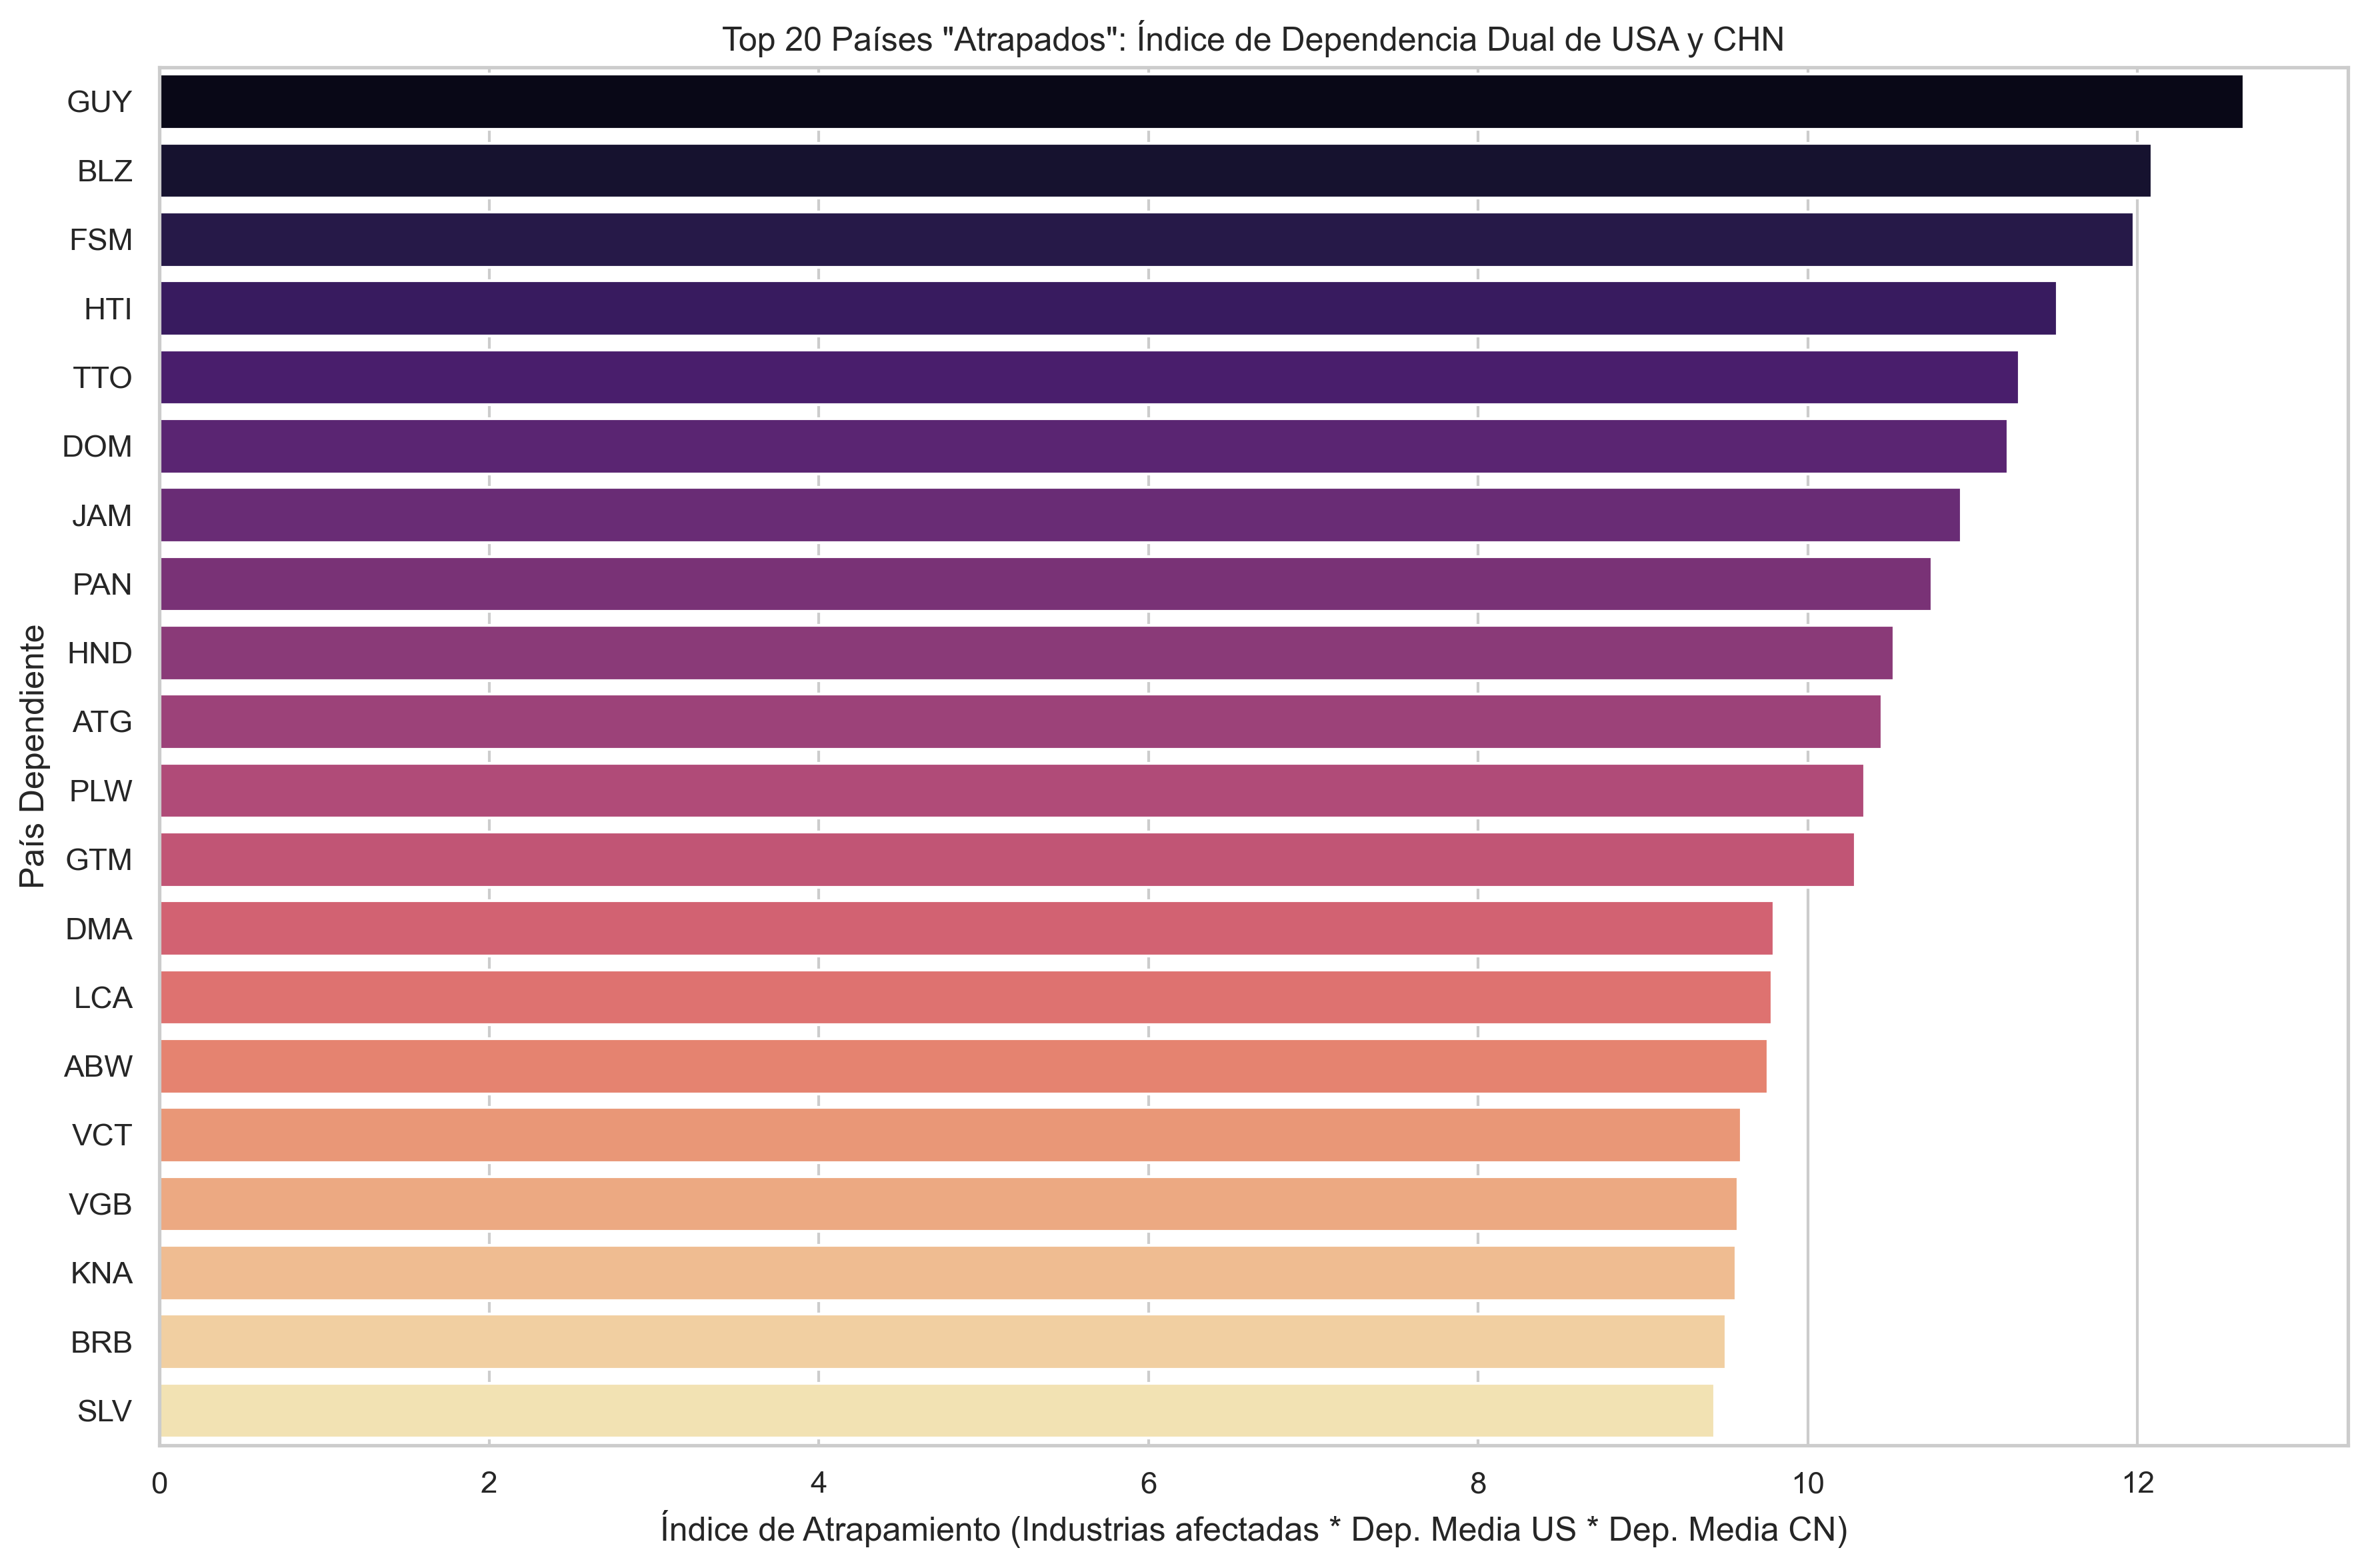

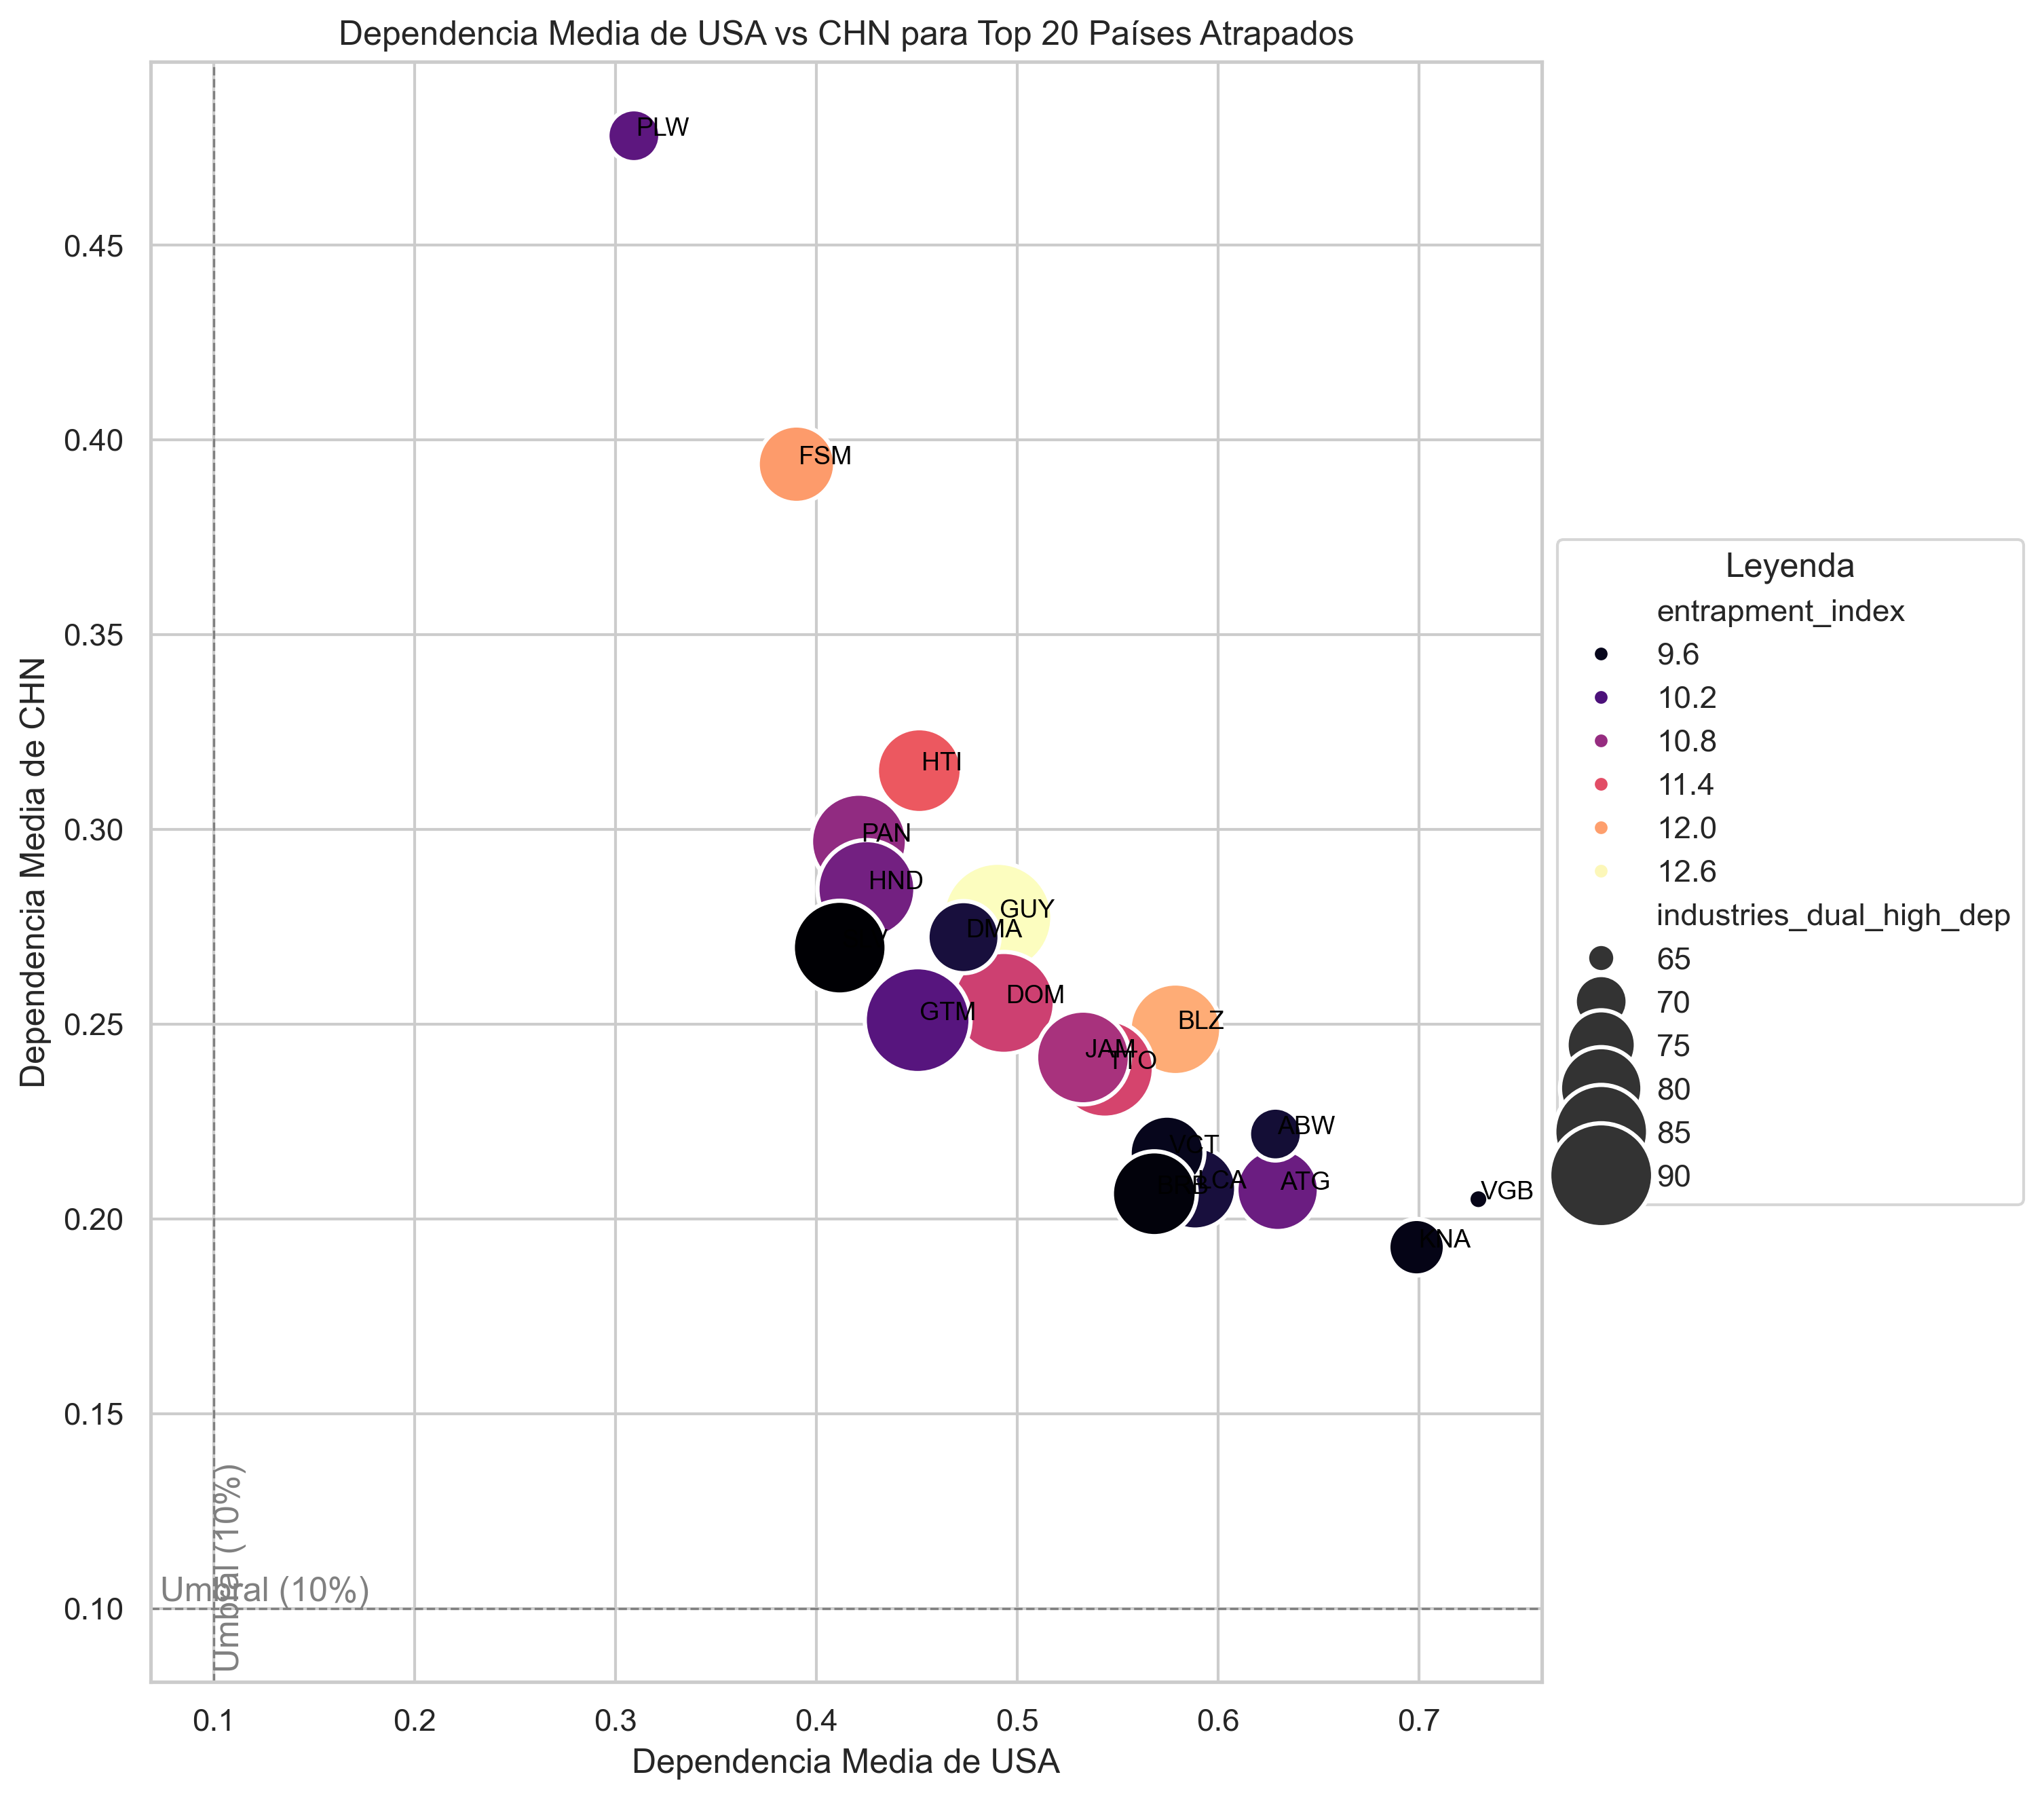


--- Identificando países proveedores cuya economía depende de los mercados de USA y CHN ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28440\2539175397.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_reliant = sns.barplot(


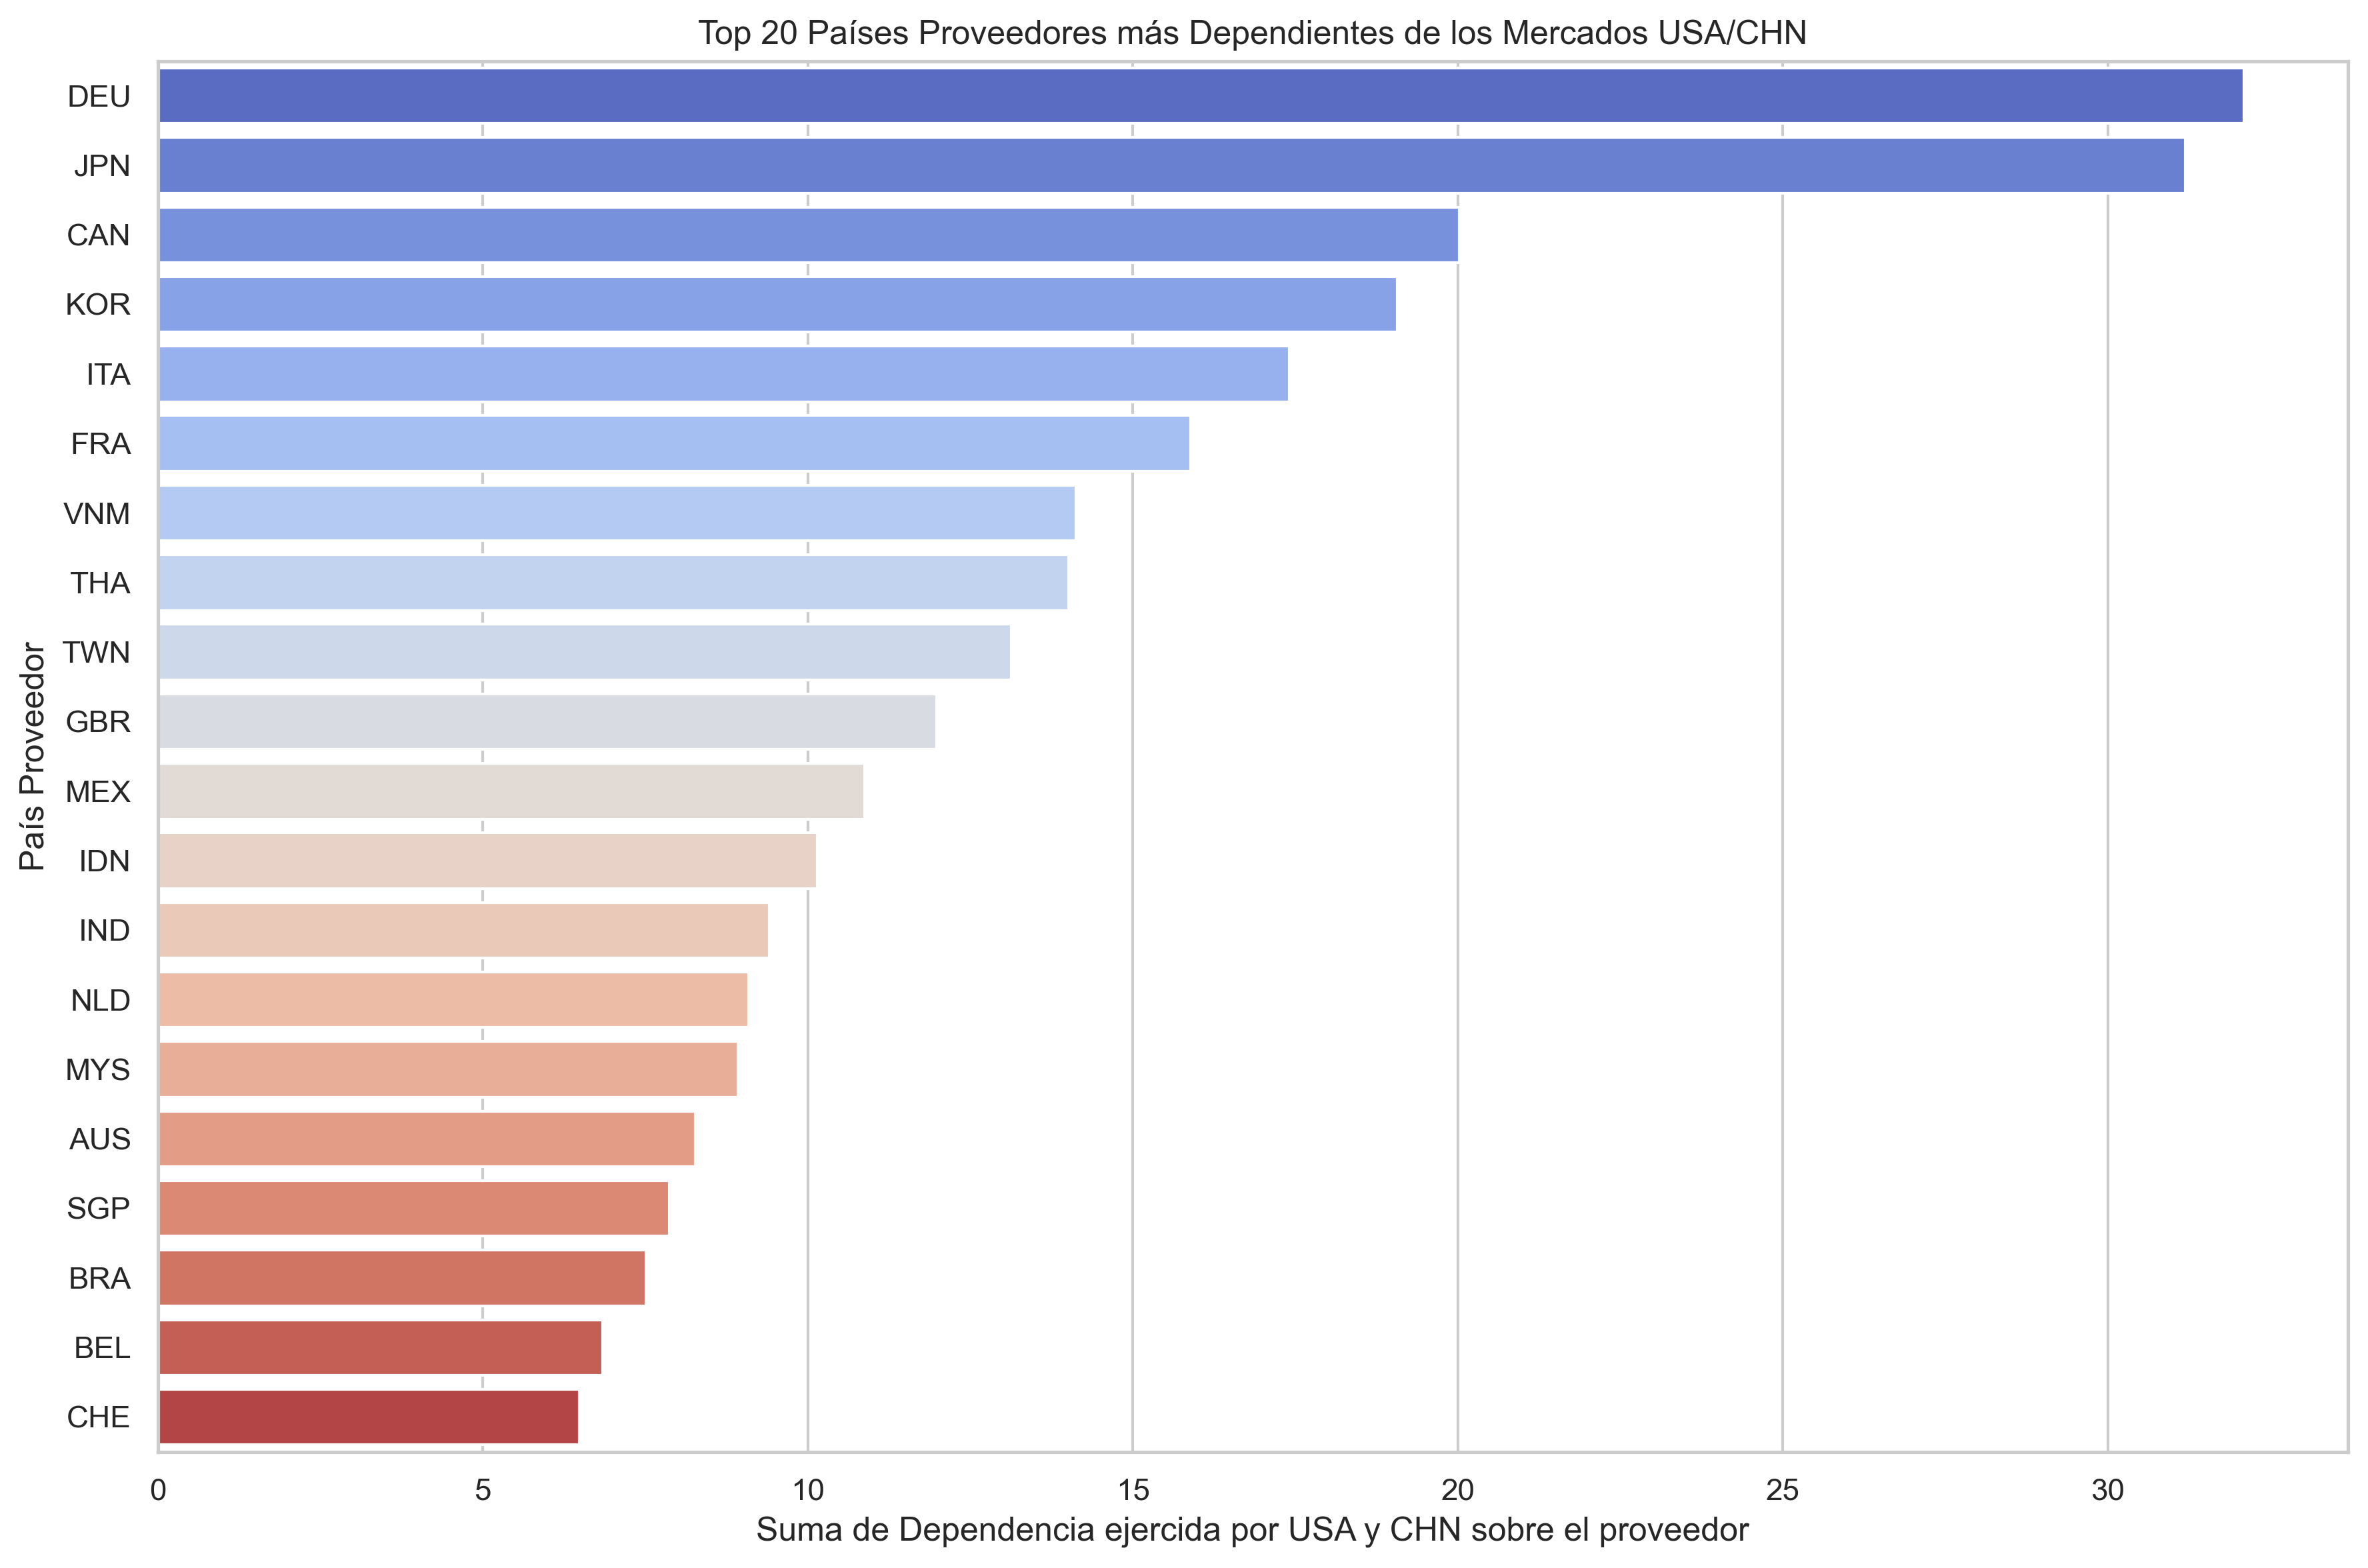


Análisis de efectos indirectos completado.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import os
import numpy as np

# --- Configuración ---
# !! Ajusta estas rutas a la ubicación real de tus archivos !!
base_path = r"c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper"
dependencies_full_file = os.path.join(base_path, "dependencies_full.csv.gz")

# Países principales
country_us = 'USA'
country_cn = 'CHN'
main_countries = [country_us, country_cn]

# Umbral para considerar "alta dependencia"
dependency_threshold = 0.1 # Puedes ajustar este valor (ej. 0.1 = 10%)

# Número de países/industrias top a mostrar en gráficos
top_n_countries = 20
top_n_industries = 15

# Estilo de los gráficos
sns.set_theme(style="whitegrid")

# --- Carga de Datos ---
print(f"Cargando datos de dependencias completas desde: {dependencies_full_file}")
try:
    with gzip.open(dependencies_full_file, 'rt', encoding='utf-8') as f:
        df_full = pd.read_csv(f, sep=';')
    print("Datos cargados exitosamente.")
    # Verificar columnas
    expected_cols = ['industry', 'dependent_country', 'supplier_country', 'dependency_value']
    if not all(col in df_full.columns for col in expected_cols):
        raise ValueError(f"Faltan columnas esperadas. Necesarias: {expected_cols}. Encontradas: {df_full.columns.tolist()}")
    # Limpiar posibles valores no numéricos en dependency_value
    df_full['dependency_value'] = pd.to_numeric(df_full['dependency_value'], errors='coerce')
    df_full.dropna(subset=['dependency_value'], inplace=True)

except FileNotFoundError:
    print(f"Error: No se encontró el archivo {dependencies_full_file}")
    exit()
except Exception as e:
    print(f"Error cargando o procesando el archivo {dependencies_full_file}: {e}")
    exit()

# --- Parte 1: Países "Atrapados en el Medio" (Alta dependencia de AMBOS US y CN) ---
print(f"\n--- Identificando países con alta dependencia (> {dependency_threshold:.0%}) de {country_us} y {country_cn} ---")

# Filtrar dependencias de terceros países hacia US y CN
df_third_party_deps = df_full[
    df_full['supplier_country'].isin(main_countries) &
    ~df_full['dependent_country'].isin(main_countries)
].copy()

# Pivotar para tener dependencia de US y CN en columnas separadas
df_pivot = df_third_party_deps.pivot_table(
    index=['dependent_country', 'industry'],
    columns='supplier_country',
    values='dependency_value',
    fill_value=0 # Rellenar con 0 si no hay dependencia registrada
).reset_index()

# Asegurarse que las columnas de US y CN existen después del pivot
if country_us not in df_pivot.columns: df_pivot[country_us] = 0
if country_cn not in df_pivot.columns: df_pivot[country_cn] = 0

# Identificar industrias con alta dependencia de AMBOS
df_pivot['dual_high_dependency'] = (
    (df_pivot[country_us] > dependency_threshold) &
    (df_pivot[country_cn] > dependency_threshold)
)

# Calcular métricas agregadas por país dependiente
country_summary = df_pivot.groupby('dependent_country').agg(
    avg_dep_on_us=('USA', 'mean'),
    avg_dep_on_cn=('CHN', 'mean'),
    industries_dual_high_dep=('dual_high_dependency', 'sum'),
    total_industries_evaluated=('industry', 'count') # Para contexto
).reset_index()

# Filtrar países con al menos una industria de alta dependencia dual
country_summary = country_summary[country_summary['industries_dual_high_dep'] > 0].copy()

# Calcular un 'Índice de Atrapamiento' (ejemplo simple, se puede refinar)
# Pondera más tener muchas industrias afectadas y alta dependencia promedio de ambos
country_summary['entrapment_index'] = (
    country_summary['industries_dual_high_dep'] *
    country_summary['avg_dep_on_us'] *
    country_summary['avg_dep_on_cn']
)

# Ordenar y seleccionar top N países
country_summary = country_summary.sort_values('entrapment_index', ascending=False)
top_countries_caught = country_summary.head(top_n_countries)

# --- Visualización Parte 1 ---

# Gráfico 1: Ranking de Países Atrapados
plt.figure(figsize=(12, 8))
barplot_caught = sns.barplot(
    x='entrapment_index',
    y='dependent_country',
    data=top_countries_caught,
    palette='magma'
)
plt.title(f'Top {top_n_countries} Países "Atrapados": Índice de Dependencia Dual de {country_us} y {country_cn}')
plt.xlabel('Índice de Atrapamiento (Industrias afectadas * Dep. Media US * Dep. Media CN)')
plt.ylabel('País Dependiente')
plt.tight_layout()
plt.show()

# Gráfico 2: Dispersión Dependencia Media US vs CN
plt.figure(figsize=(12, 9))
scatter_caught = sns.scatterplot(
    data=top_countries_caught,
    x='avg_dep_on_us',
    y='avg_dep_on_cn',
    size='industries_dual_high_dep', # Tamaño burbuja = nº industrias afectadas
    hue='entrapment_index', # Color burbuja = índice total
    palette='magma',
    sizes=(50, 1500), # Rango de tamaños de burbuja
    legend='auto' # Mostrar leyendas
)
# Añadir etiquetas de países a los puntos
for i in range(top_countries_caught.shape[0]):
 plt.text(
     x=top_countries_caught['avg_dep_on_us'].iloc[i] + 0.001, # ligero offset
     y=top_countries_caught['avg_dep_on_cn'].iloc[i],
     s=top_countries_caught['dependent_country'].iloc[i],
     fontdict=dict(color='black',size=9)
 )

plt.title(f'Dependencia Media de {country_us} vs {country_cn} para Top {top_n_countries} Países Atrapados')
plt.xlabel(f'Dependencia Media de {country_us}')
plt.ylabel(f'Dependencia Media de {country_cn}')
plt.axhline(dependency_threshold, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(dependency_threshold, color='grey', linestyle='--', linewidth=0.8)
plt.text(plt.xlim()[0], dependency_threshold, f' Umbral ({dependency_threshold:.0%})', color='grey', va='bottom', ha='left')
plt.text(dependency_threshold, plt.ylim()[0], f' Umbral ({dependency_threshold:.0%})', color='grey', va='bottom', ha='left', rotation=90)
plt.legend(title='Leyenda', loc='center left', bbox_to_anchor=(1, 0.5)) # Mover leyenda fuera
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar layout para leyenda
plt.show()


# --- Parte 2: Países que dependen de los mercados de US/CN ---
print(f"\n--- Identificando países proveedores cuya economía depende de los mercados de {country_us} y {country_cn} ---")

# Filtrar dependencias DONDE US o CN son los DEPENDIENTES
df_market_reliance = df_full[
    df_full['dependent_country'].isin(main_countries) &
    ~df_full['supplier_country'].isin(main_countries)
].copy()

# Calcular la dependencia total que US/CN ponen sobre cada país proveedor
market_reliance_summary = df_market_reliance.groupby('supplier_country').agg(
    total_dep_from_us_cn = ('dependency_value', 'sum'),
    avg_dep_from_us_cn = ('dependency_value', 'mean'),
    num_industries_supplied = ('industry', 'nunique')
).reset_index()

# Ordenar por dependencia total (suma de dependency_value donde el proveedor es X y el dependiente es US o CN)
market_reliance_summary = market_reliance_summary.sort_values('total_dep_from_us_cn', ascending=False)
top_market_reliant_countries = market_reliance_summary.head(top_n_countries)

# --- Visualización Parte 2 ---
plt.figure(figsize=(12, 8))
barplot_reliant = sns.barplot(
    x='total_dep_from_us_cn',
    y='supplier_country',
    data=top_market_reliant_countries,
    palette='coolwarm'
)
plt.title(f'Top {top_n_countries} Países Proveedores más Dependientes de los Mercados {country_us}/{country_cn}')
plt.xlabel(f'Suma de Dependencia ejercida por {country_us} y {country_cn} sobre el proveedor')
plt.ylabel('País Proveedor')
plt.tight_layout()
plt.show()

print("\nAnálisis de efectos indirectos completado.")

## Relaciones Críticas (critical_relations.csv.gz):Filtra este archivo para ver las relaciones donde EEUU o China son dependent_country o supplier_country. Estas son sus conexiones comerciales más frágiles (alta dependencia, pocas alternativas según tu umbral min_paths).

Identifica las industrias que aparecen con más frecuencia en estas relaciones críticas relacionadas con EEUU/China. Son sectores estratégicamente vulnerables.

Busca relaciones críticas entre terceros países en industrias clave. Una guerra comercial EEUU-China podría desestabilizar estas relaciones indirectamente por efectos económicos generales o cambios bruscos en los flujos.


Configuración y Carga: Define rutas, países principales, N para los tops y carga critical_relations.csv.gz. Incluye una sección importante para verificar y renombrar columnas si los nombres en tu archivo no coinciden con los esperados (exportador, importador, criticidad, etc.).
Tarea 1 (Relaciones Críticas US/China):
Filtra df_critical para mantener solo las filas donde importador o exportador sea 'USA' o 'CHN'.
Ordena estas filas por la columna criticidad de mayor a menor.
Muestra las top_n_relations filas más críticas en formato tabla (usando display si está disponible, o print como alternativa).
Tarea 2 (Industrias Clave):
Toma el DataFrame filtrado de la Tarea 1 (df_critical_us_cn).
Cuenta cuántas veces aparece cada valor en la columna industry usando value_counts().
Selecciona las top_n_industries más frecuentes.
Imprime esta lista.
Genera un gráfico de barras mostrando la frecuencia de estas industrias principales.
Guarda la lista de nombres de estas industrias (key_industry_list) para usarla en la siguiente tarea.
Tarea 3 (Relaciones Críticas Terceros en Industrias Clave):
Verifica si se identificaron industrias clave en la Tarea 2.
Filtra el DataFrame original (df_critical) para excluir las filas que involucran a 'USA' o 'CHN'.
Filtra este subconjunto nuevamente para mantener solo las filas cuya industry esté en la key_industry_list (las identificadas como vulnerables en el contexto US/China).
Ordena por criticidad.
Muestra las top_n_relations filas más críticas de este grupo (relaciones entre terceros países en sectores potencialmente afectados por una disputa US/China).
Este análisis te mostrará dónde residen las mayores fragilidades directas para EEUU y China según tu definición de criticidad, qué sectores industriales son los más expuestos en estas relaciones, y cómo esas tensiones podrían propagarse a relaciones críticas entre otros países en esos mismos sectores.

Cargando datos de relaciones críticas desde: c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper\critical_relations.csv.gz
Datos cargados exitosamente.

--- Analizando Relaciones Críticas que involucran a USA o CHN ---

Top 15 relaciones críticas que involucran a USA o CHN:


industry importador exportador  criticidad  \
2298                  Footwear        ESH        CHN         1.0   
2691           Health services        JPN        USA         1.0   
2693           Health services        MAR        USA         1.0   
2694           Health services        MYS        USA         1.0   
2695           Health services        NIC        USA         1.0   
2696           Health services        PAN        USA         1.0   
2697           Health services        PHL        USA         1.0   
2698           Health services        SAU        USA         1.0   
2699           Health services        SGP        USA         1.0   
2701           Health services        TWN        USA         1.0   
2702           Health services        VEN        USA         1.0   
2703           Health services        VNM        USA         1.0   
2704           Health services        ZAF        USA         1.0   
2720  Insulated wire and cable        ESH        CHN         1.0   
2724  Insulated wire and cable        HMD        USA         1.0   

      dependencia_total  caminos_alternativos  
2298           1.000000                     0  
2691           1.000000                     0  
2693           0.816993                     0  
2694           1.000000                     0  
2695           1.000000                     0  
2696           1.000000                     0  
2697           0.974805                     0  
2698           1.000000                     0  
2699           0.992589                     0  
2701           0.796269                     0  
2702           1.000000                     0  
2703           1.000000                     0  
2704           0.931273                     0  
2720           1.000000                     0  
2724           1.000000                     0


--- Identificando Industrias Estratégicas (Más frecuentes en relaciones críticas US/China) ---

Top 15 industrias más frecuentes en relaciones críticas US/China:
industry
Soybeans                                       33
Coke oven products                             30
Railway/tramway locomotives & rolling stock    29
Education services                             28
Service activities related to printing         26
Rice (raw)                                     26
Mining of lignite                              25
Health services                                25
Extraction crude petroleum and natural gas     24
Live Cattle                                    24
Dressing & dyeing of fur; processing of fur    23
Weapons and ammunition                         22
Machinery for metallurgy                       21
Mining of hard coal                            20
Cereal products                                20


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28440\3999332826.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_industries = sns.barplot(


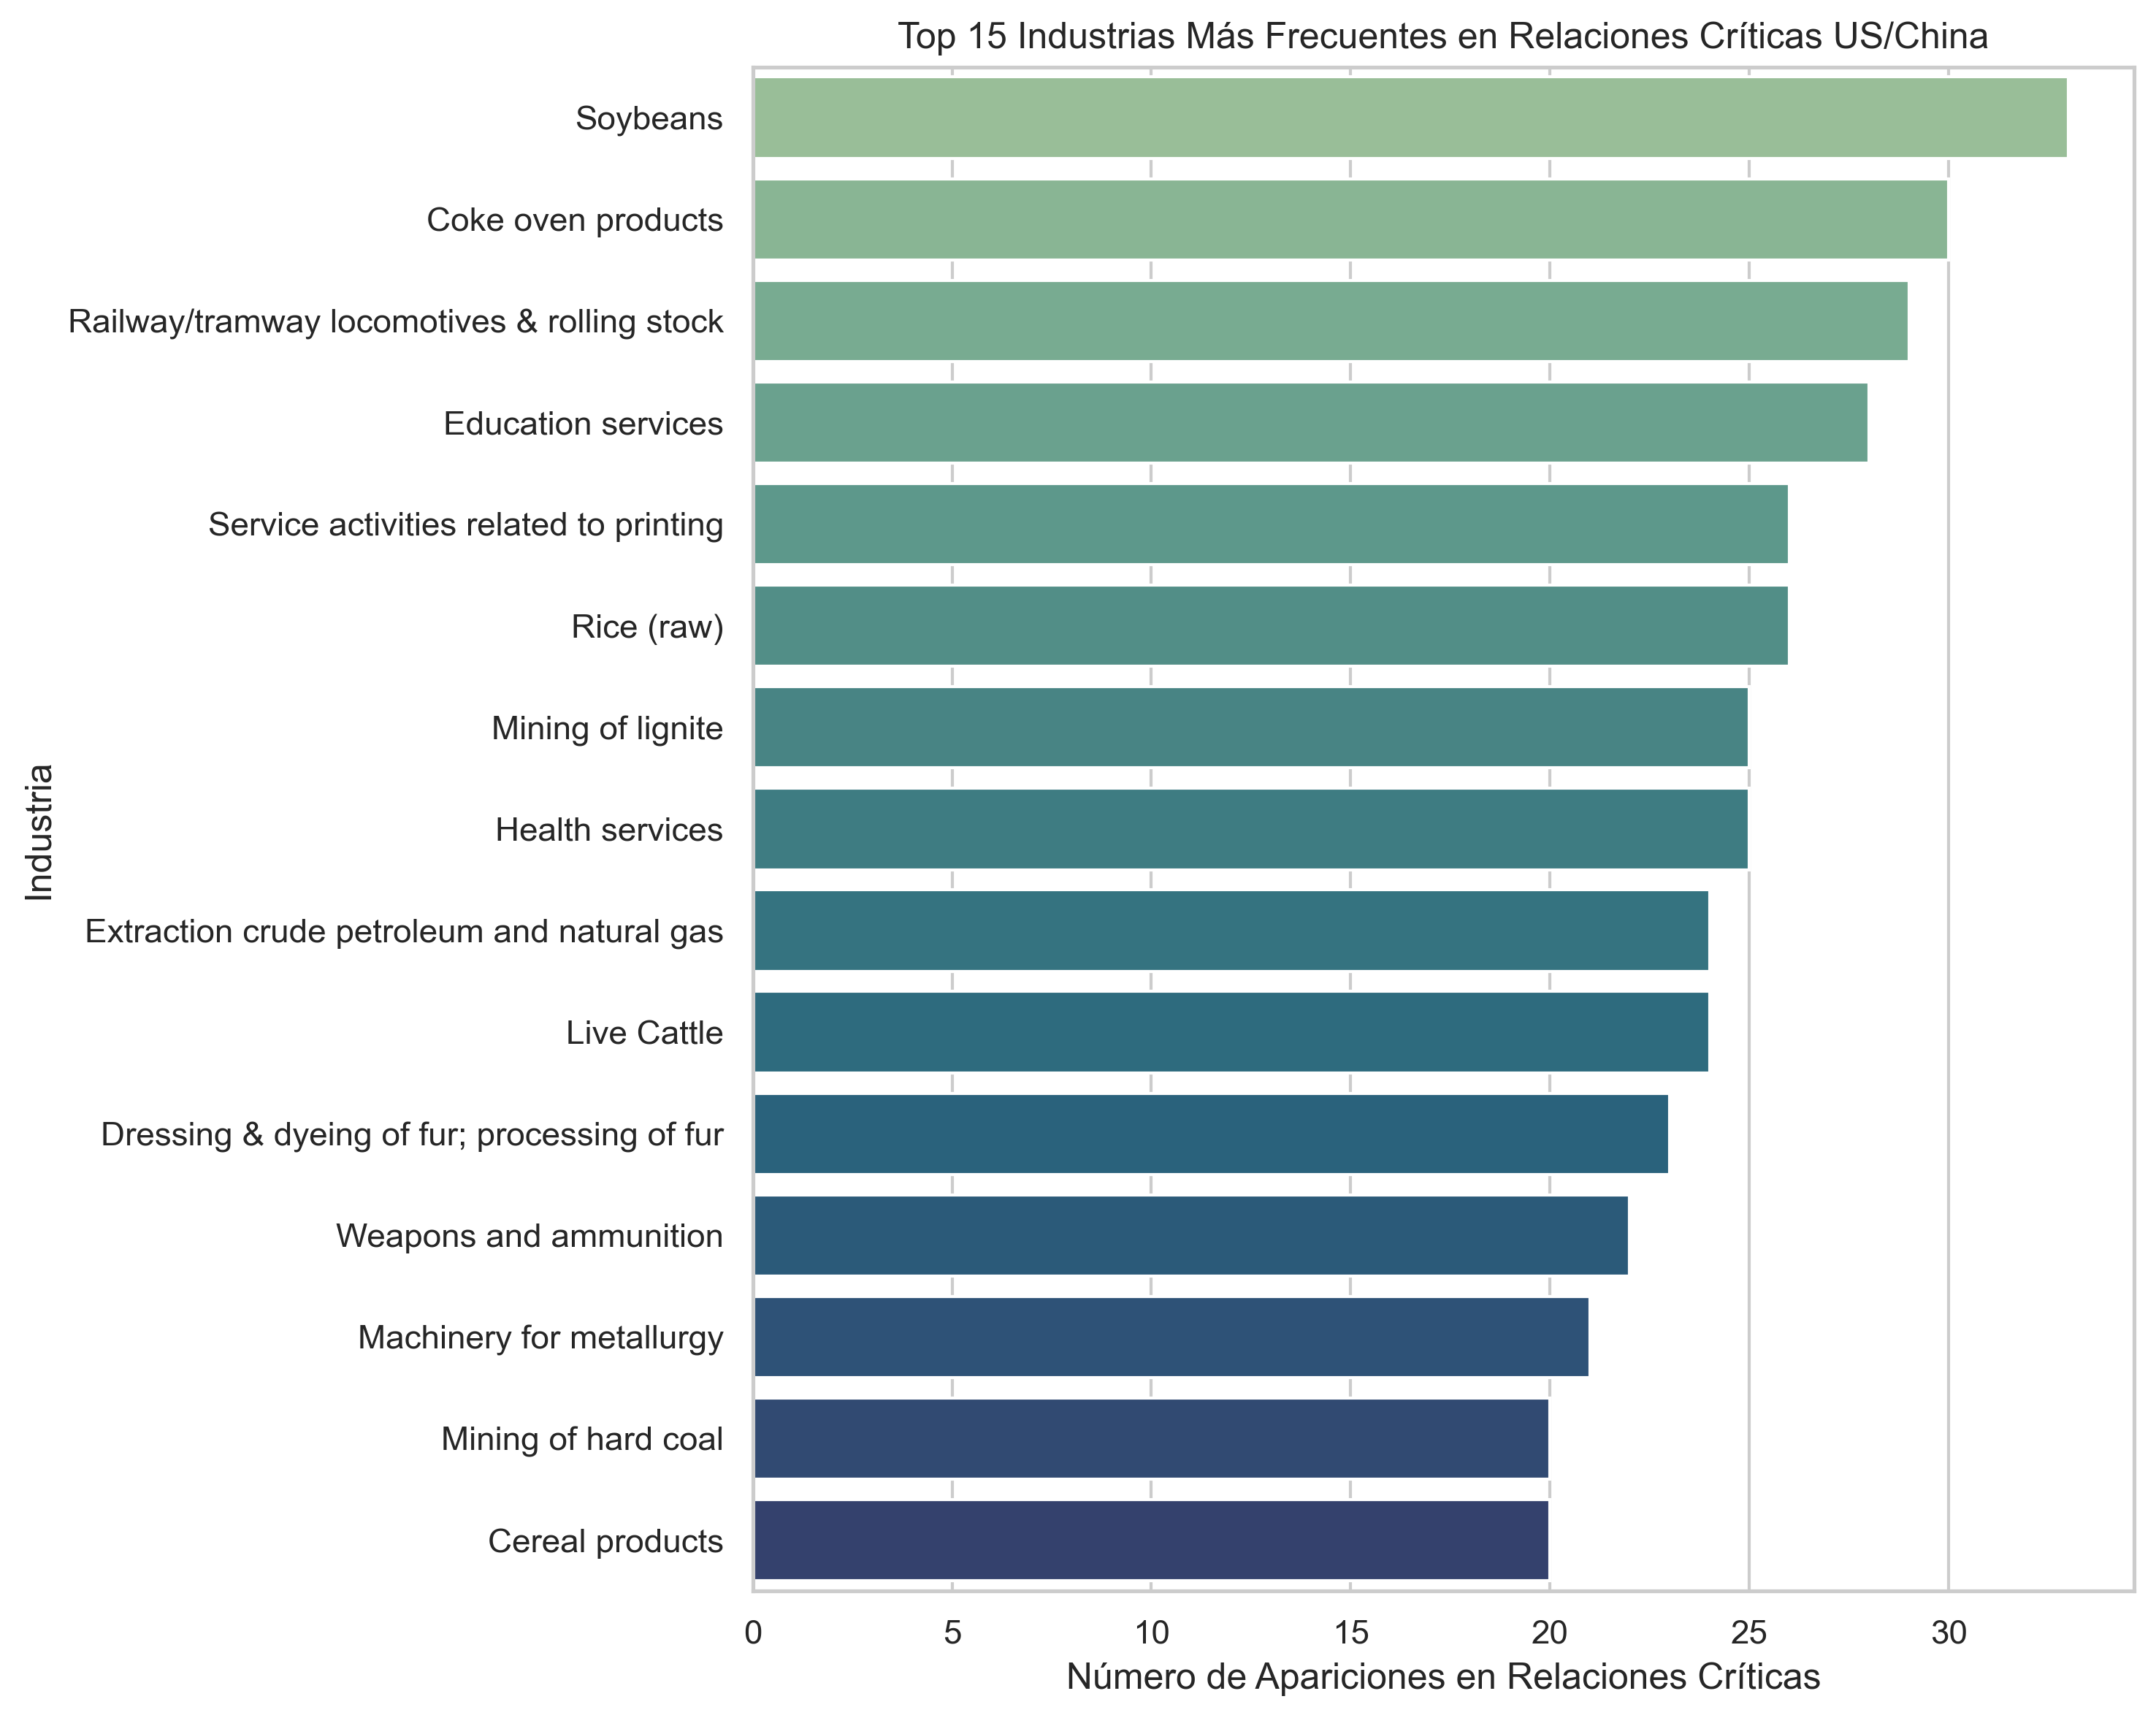


--- Analizando Relaciones Críticas ENTRE TERCEROS PAÍSES en Industrias Clave ---

Top 15 relaciones críticas ENTRE TERCEROS PAÍSES en industrias clave (vulnerables a efectos US/China):


industry importador exportador  criticidad  \
790       Cereal products        AFG        PAK         1.0   
3569  Mining of hard coal        PRY        NLD         1.0   
3562  Mining of hard coal        NER        NGA         1.0   
3563  Mining of hard coal        NGA        ZAF         1.0   
3564  Mining of hard coal        NRU        AUS         1.0   
3565  Mining of hard coal        NZL        AUS         1.0   
3566  Mining of hard coal        PAK        ZAF         1.0   
3567  Mining of hard coal        PER        COL         1.0   
3568  Mining of hard coal        PRK        COL         1.0   
3570  Mining of hard coal        PYF        NZL         1.0   
3560  Mining of hard coal        MUS        ZAF         1.0   
3571  Mining of hard coal        RWA        TZA         1.0   
3572  Mining of hard coal        SDN        EGY         1.0   
3573  Mining of hard coal        SLV        MEX         1.0   
3575  Mining of hard coal        SWZ        ZAF         1.0   

      dependencia_total  caminos_alternativos  
790            1.000000                     0  
3569           0.948960                     0  
3562           1.000000                     0  
3563           1.000000                     0  
3564           1.000000                     0  
3565           1.000000                     0  
3566           0.766571                     0  
3567           1.000000                     0  
3568           1.000000                     0  
3570           1.000000                     0  
3560           0.933306                     0  
3571           1.000000                     0  
3572           0.984213                     0  
3573           0.827717                     0  
3575           1.000000                     0


Análisis de puntos críticos y estrangulamientos completado.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import os

# --- Configuración ---
# !! Ajusta estas rutas a la ubicación real de tus archivos !!
base_path = r"c:\Users\Usuario\Documents\Github\Seguridad económica\src\data\processed\ficheros_paper"
critical_relations_file = os.path.join(base_path, "critical_relations.csv.gz")

# Países principales
country_us = 'USA'
country_cn = 'CHN'
main_countries = [country_us, country_cn]

# Número de items top a mostrar
top_n_relations = 15
top_n_industries = 15

# Estilo de los gráficos
sns.set_theme(style="whitegrid")

# --- Carga de Datos ---
print(f"Cargando datos de relaciones críticas desde: {critical_relations_file}")
try:
    with gzip.open(critical_relations_file, 'rt', encoding='utf-8') as f:
        df_critical = pd.read_csv(f, sep=';')
    print("Datos cargados exitosamente.")

    # --- !! Verificación y Renombrado de Columnas (IMPORTANTE) !! ---
    # El script anterior generó este archivo. Verifica si los nombres son los esperados.
    # Nombres esperados basados en el script que generó el archivo:
    # 'exportador', 'importador', 'dependencia_total', 'dependencia_directa',
    # 'caminos_alternativos', 'criticidad', 'industry'
    # Descomenta y ajusta el renombrado si es necesario:
    # column_mapping = {
    #     'nombre_antiguo1': 'exportador',
    #     'nombre_antiguo2': 'importador',
    #     'nombre_antiguo3': 'dependencia_total',
    #     'nombre_antiguo4': 'dependencia_directa',
    #     'nombre_antiguo5': 'caminos_alternativos',
    #     'nombre_antiguo6': 'criticidad',
    #     'nombre_antiguo7': 'industry',
    # }
    # df_critical = df_critical.rename(columns=column_mapping)

    # Asegurarse que las columnas necesarias existen después de posible renombrado
    required_cols = ['exportador', 'importador', 'criticidad', 'industry', 'caminos_alternativos', 'dependencia_total']
    if not all(col in df_critical.columns for col in required_cols):
        raise ValueError(f"Faltan columnas requeridas. Necesarias: {required_cols}. Encontradas: {df_critical.columns.tolist()}")

    # Convertir columnas numéricas
    for col in ['criticidad', 'caminos_alternativos', 'dependencia_total']:
         df_critical[col] = pd.to_numeric(df_critical[col], errors='coerce')
    df_critical.dropna(subset=['criticidad', 'caminos_alternativos', 'dependencia_total'], inplace=True)


except FileNotFoundError:
    print(f"Error: No se encontró el archivo {critical_relations_file}")
    exit()
except Exception as e:
    print(f"Error cargando o procesando el archivo {critical_relations_file}: {e}")
    exit()


# --- Tarea 1: Relaciones Críticas que Involucran a US o China ---
print(f"\n--- Analizando Relaciones Críticas que involucran a {country_us} o {country_cn} ---")

df_critical_us_cn = df_critical[
    df_critical['importador'].isin(main_countries) |
    df_critical['exportador'].isin(main_countries)
].copy()

# Ordenar por criticidad y mostrar top N
df_critical_us_cn = df_critical_us_cn.sort_values('criticidad', ascending=False)
top_critical_us_cn = df_critical_us_cn.head(top_n_relations)

print(f"\nTop {top_n_relations} relaciones críticas que involucran a {country_us} o {country_cn}:")
# Usar display si se está en un entorno tipo Jupyter/Colab para mejor formato
try:
    from IPython.display import display
    display(top_critical_us_cn[['industry', 'importador', 'exportador', 'criticidad', 'dependencia_total', 'caminos_alternativos']])
except ImportError:
    print(top_critical_us_cn[['industry', 'importador', 'exportador', 'criticidad', 'dependencia_total', 'caminos_alternativos']].to_string())


# --- Tarea 2: Industrias Más Frecuentes en Relaciones Críticas US/China ---
print(f"\n--- Identificando Industrias Estratégicas (Más frecuentes en relaciones críticas US/China) ---")

if not df_critical_us_cn.empty:
    industry_counts = df_critical_us_cn['industry'].value_counts()
    top_industries = industry_counts.head(top_n_industries)

    print(f"\nTop {top_n_industries} industrias más frecuentes en relaciones críticas US/China:")
    print(top_industries.to_string())

    # Visualización
    plt.figure(figsize=(10, 8))
    barplot_industries = sns.barplot(
        x=top_industries.values,
        y=top_industries.index,
        palette='crest'
    )
    plt.title(f'Top {top_n_industries} Industrias Más Frecuentes en Relaciones Críticas US/China')
    plt.xlabel('Número de Apariciones en Relaciones Críticas')
    plt.ylabel('Industria')
    plt.tight_layout()
    plt.show()

    # Guardar la lista de industrias clave para la siguiente tarea
    key_industry_list = top_industries.index.tolist()
else:
    print("No se encontraron relaciones críticas que involucren a US o China para analizar industrias.")
    key_industry_list = []


# --- Tarea 3: Relaciones Críticas ENTRE TERCEROS PAÍSES en Industrias Clave ---
print(f"\n--- Analizando Relaciones Críticas ENTRE TERCEROS PAÍSES en Industrias Clave ---")

if key_industry_list: # Solo proceder si identificamos industrias clave
    # Filtrar relaciones que NO involucran a US o China
    df_critical_third_parties = df_critical[
        ~df_critical['importador'].isin(main_countries) &
        ~df_critical['exportador'].isin(main_countries)
    ].copy()

    # Filtrar por las industrias clave identificadas en la Tarea 2
    df_critical_third_parties_key_ind = df_critical_third_parties[
        df_critical_third_parties['industry'].isin(key_industry_list)
    ]

    # Ordenar por criticidad y mostrar top N
    df_critical_third_parties_key_ind = df_critical_third_parties_key_ind.sort_values('criticidad', ascending=False)
    top_critical_third_parties = df_critical_third_parties_key_ind.head(top_n_relations)

    print(f"\nTop {top_n_relations} relaciones críticas ENTRE TERCEROS PAÍSES en industrias clave (vulnerables a efectos US/China):")
    if not top_critical_third_parties.empty:
        try:
            from IPython.display import display
            display(top_critical_third_parties[['industry', 'importador', 'exportador', 'criticidad', 'dependencia_total', 'caminos_alternativos']])
        except ImportError:
            print(top_critical_third_parties[['industry', 'importador', 'exportador', 'criticidad', 'dependencia_total', 'caminos_alternativos']].to_string())
    else:
        print("No se encontraron relaciones críticas entre terceros países en las industrias clave identificadas.")

else:
    print("No se identificaron industrias clave en la Tarea 2, por lo que se omite el análisis de terceros países.")


print("\nAnálisis de puntos críticos y estrangulamientos completado.")